In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('/content/drive/My Drive/innomatics_data/amcat_data.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [79]:
df.drop(['Unnamed: 0','ID'], axis=1, inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeID              3998 non-null   int64         
 13  Col

In [81]:
df.columns = df.columns.str.strip()

In [82]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [83]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns


unique_values = {col: df[col].unique() for col in categorical_columns}


for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")
    print('-'*100)

Unique values in 'DOL': ['present' datetime.datetime(2015, 3, 1, 0, 0)
 datetime.datetime(2015, 5, 1, 0, 0) datetime.datetime(2015, 7, 1, 0, 0)
 datetime.datetime(2015, 4, 1, 0, 0) datetime.datetime(2014, 10, 1, 0, 0)
 datetime.datetime(2014, 9, 1, 0, 0) datetime.datetime(2014, 6, 1, 0, 0)
 datetime.datetime(2012, 9, 1, 0, 0) datetime.datetime(2013, 12, 1, 0, 0)
 datetime.datetime(2015, 6, 1, 0, 0) datetime.datetime(2013, 10, 1, 0, 0)
 datetime.datetime(2015, 1, 1, 0, 0) datetime.datetime(2014, 4, 1, 0, 0)
 datetime.datetime(2013, 6, 1, 0, 0) datetime.datetime(2012, 3, 1, 0, 0)
 datetime.datetime(2014, 7, 1, 0, 0) datetime.datetime(2013, 2, 1, 0, 0)
 datetime.datetime(2014, 1, 1, 0, 0) datetime.datetime(2013, 4, 1, 0, 0)
 datetime.datetime(2012, 7, 1, 0, 0) datetime.datetime(2014, 5, 1, 0, 0)
 datetime.datetime(2013, 9, 1, 0, 0) datetime.datetime(2015, 2, 1, 0, 0)
 datetime.datetime(2012, 1, 1, 0, 0) datetime.datetime(2015, 8, 1, 0, 0)
 datetime.datetime(2014, 8, 1, 0, 0) datetime.date

# **Data Cleaning**

-  DOJ and DOL columns

In [84]:
df['DOJ']=pd.to_datetime(df['DOJ'])

In [85]:
df['DOL'] = df['DOL'].replace(to_replace='present', value=pd.Timestamp.now())
df['DOL']=pd.to_datetime(df['DOL'])

In [86]:
((df['DOL']-df['DOJ']).dt.days)/30.436875

,0
0,148.109817
1,133.095135
2,124.125752
3,159.149059
4,11.992033
...,...
3993,12.024888
3994,0.000000
3995,135.132138
3996,6.045299


In [87]:
df['Tenure'] = ((df['DOL']-df['DOJ']).dt.days)/30.436875
df['Tenure'] = df['Tenure'].astype(int)
df['Tenure'].unique()

array([148, 133, 124, 159,  11,   8, 135, 123,  48,  38, 130, 129, 134,
       121,  13,   4,  22,  16,  17,   7, 145,  32,   1,  -7, 154, 132,
       120, 117, 127, 139,  53,   9,   2, 122,  34,  20,  25, 116, 114,
       119, 151,  42, 131,   5,  24,   6,  18, 112, 125,   3, 155, 111,
       137,  -4,  44, 163, 136, 115,  10, 147,  41, 174,  15,  29,  14,
       144, 138, 126, 167,  23,  45,  -8,  27,  26, 140, 157,  21, 152,
        37,  43, 153, 146, 118,  30, 150,  12,  -3, 141,  36,  -2,   0,
        39, 128, 113,  33, 149,  57,  19, 166, 164, 142,  40,  -9, 158,
       165,  28, 143, 171, 170,  35, 161, 156,  50,  52, 169, 160, 172,
       162,  61,  31,  -5,  49,  58, 175, 107,  47,  55, 168, 225, 110,
        -6,  56, 106,  54,  72, 400,  46, 207])

In [88]:
#dob

In [89]:
df['DOB']=pd.to_datetime(df['DOB'])
df['DOB'].dtype

dtype('<M8[ns]')

In [90]:
from datetime import datetime
datetime.now()-df['DOB']

,DOB
0,12646 days 05:12:13.694383
1,12784 days 05:12:13.694383
2,11750 days 05:12:13.694383
3,12722 days 05:12:13.694383
4,12273 days 05:12:13.694383
...,...
3993,13687 days 05:12:13.694383
3994,11726 days 05:12:13.694383
3995,12147 days 05:12:13.694383
3996,11886 days 05:12:13.694383


In [91]:
from datetime import datetime
import pandas as pd


current_date = pd.to_datetime(datetime.now())

df['Age'] = (current_date - df['DOB']).dt.days // 365.25

print(df['Age'])

0       34.0
1       35.0
2       32.0
3       34.0
4       33.0
        ... 
3993    37.0
3994    32.0
3995    33.0
3996    32.0
3997    33.0
Name: Age, Length: 3998, dtype: float64


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   datetime64[ns]
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeID              3998 non-null   int64         
 13  Col

In [93]:
# checking duplicate values
df.duplicated().sum()

0

In [94]:
#checking null values

df.isnull().sum()

,0
Salary,0
DOJ,0
DOL,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0
10board,0
12graduation,0


In [95]:
# 10 th data

In [96]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [97]:
df[df['10board'] == 0]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age
44,380000,2012-05-01,2015-04-01 00:00:00.000000,programmer analyst,Bangalore,f,1989-01-06,84.50,0,2007,82.50,0,3461,2,B.Tech/B.E.,computer engineering,92.1,3461,0,Karnataka,2011,425,525,515,0.377551,375,-1,-1,-1,-1,-1,-1,0.5100,0.6568,-0.6343,0.29730,0.1864,34,35.0
57,525000,2012-03-01,2024-10-04 05:12:13.446580,test engineer,Hyderabad,f,1989-08-15,89.88,0,2007,95.40,0,1027,2,B.Tech/B.E.,electronics and communication engineering,80.8,1027,1,Telangana,2011,555,475,635,0.694479,-1,366,-1,-1,-1,420,-1,0.3555,-0.2793,-0.6343,-0.29020,-0.2875,151,35.0
84,445000,2011-11-01,2024-10-04 05:12:13.446580,software test engineer,Pune,f,1987-05-10,73.33,0,2004,71.33,0,331,2,MCA,computer application,61.0,331,1,Maharashtra,2010,375,535,534,0.600057,435,-1,-1,-1,-1,-1,-1,-2.2720,-0.2793,-1.2148,0.88480,-0.7615,155,37.0
101,205000,2011-12-01,2024-10-04 05:12:13.446580,electrical engineer,Chennai,m,1989-03-05,84.60,0,2006,66.50,0,417,2,B.Tech/B.E.,electronics and electrical engineering,66.7,417,1,Tamil Nadu,2010,345,255,395,0.058793,195,200,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.1988,0.29730,-0.7615,154,35.0
114,640000,2010-04-01,2024-10-04 05:12:13.446580,programmer analyst,Bangalore,m,1987-04-24,78.00,0,2004,71.30,0,5400,2,B.Tech/B.E.,information technology,67.0,5400,0,Madhya Pradesh,2009,455,605,625,0.916870,555,-1,-1,-1,-1,-1,-1,-0.2628,-0.5913,0.2366,-0.17270,0.8183,174,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,700000,2011-07-01,2014-09-01 00:00:00.000000,planning engineer,Rajpura,m,1987-12-27,84.20,0,2006,69.20,0,64,2,B.Tech/B.E.,civil engineering,65.0,64,0,Uttar Pradesh,2011,475,635,595,0.904741,-1,-1,-1,-1,-1,-1,460,-1.3447,0.0328,-2.3759,-0.99530,0.3444,38,36.0
3977,415000,2011-09-01,2024-10-04 05:12:13.446580,software engineer,Mumbai,m,1990-02-27,62.00,0,2007,61.00,0,4948,2,B.Tech/B.E.,information technology,60.0,4948,1,Rajasthan,2011,535,385,335,0.342315,365,-1,-1,-1,-1,-1,-1,-1.9629,-0.2793,-0.3440,0.53230,-0.1295,157,34.0
3988,200000,2013-02-01,2013-07-01 00:00:00.000000,data analyst,Bangalore,f,1991-05-15,74.40,0,2008,53.33,0,1109,2,B.Tech/B.E.,information science engineering,63.2,1109,1,Karnataka,2012,404,505,435,0.635979,445,-1,-1,-1,-1,-1,-1,-0.5332,-0.1232,-0.0537,1.32550,0.5024,4,33.0
3990,480000,2012-02-01,2024-10-04 05:12:13.446580,senior systems engineer,Hyderabad,f,1989-09-04,88.00,0,2007,88.00,0,6327,2,B.Tech/B.E.,electronics and communication engineering,73.0,6327,0,Andhra Pradesh,2011,334,425,605,0.824666,285,400,-1,-1,-1,233,-1,0.6646,0.3448,0.3817,-1.34780,0.8183,152,35.0


In [98]:
XBoard={'board ofsecondary education,ap':'STATE', 'cbse':'CBSE', 'state board':'STATE',
       'mp board bhopal':'STATE', 'icse':'ICSE',
       'karnataka secondary school of examination':'STATE', 'up':'STATE',
       'karnataka state education examination board':'STATE', 'ssc':'STATE',
       'kerala state technical education':'STATE', 0:'Other', 'bseb':'STATE',
       'state board of secondary education, andhra pradesh':'STATE',
       'matriculation':'Other', 'gujarat state board':'STATE', 'karnataka state board':'STATE',
       'wbbse':'STATE', 'maharashtra state board':'STATE', 'icse board':'ICSE', 'up board':'STATE',
       'board of secondary education(bse) orissa':'STATE',
       'little jacky matric higher secondary school':'Other',
       'uttar pradesh board':'STATE', 'bsc,orissa':'STATE', 'mp board':'STATE', 'upboard':'STATE',
       'matriculation board':'Other', 'j & k bord':'STATE', 'rbse':'STATE',
       'central board of secondary education':'CBSE', 'pseb':'STATE', 'jkbose':'STATE',
       'haryana board of school education,(hbse)':'STATE', 'metric':'Other', 'ms board':'STATE',
       'kseeb':'STATE', 'stateboard':'STATE', 'maticulation':'Other',
       'karnataka secondory education board':'STATE', 'mumbai board':'STATE', 'sslc':'STATE',
       'kseb':'STATE', 'board secondary  education':'STATE', 'matric board':'Other',
       'board of secondary education':'STATE',
       'west bengal board of secondary education':'STATE',
       'jharkhand secondary examination board,ranchi':'STATE', 'u p board':'STATE',
       'bseb,patna':'STATE', 'hsc':'STATE', 'bse':'STATE', 'sss pune':'STATE',
       'karnataka education board (keeb)':'STATE', 'kerala':'STATE',
       'state board of secondary education( ssc)':'STATE', 'gsheb':'STATE',
       'up(allahabad)':'STATE', 'nagpur':'STATE', 'don bosco maatriculation school':'ICSE',
       'karnataka state secondary education board':'STATE', 'maharashtra':'STATE',
       'karnataka secondary education board':'STATE',
       'himachal pradesh board of school education':'STATE',
       'certificate of middle years program of ib':'Other',
       'karnataka board of secondary education':'STATE',
       'board of secondary education rajasthan':'STATE', 'uttarakhand board':'STATE',
       'ua':'STATE', 'board of secendary education orissa':'STATE',
       'karantaka secondary education and examination borad':'STATE', 'hbsc':'STATE',
       'kseeb(karnataka secondary education examination board)':'STATE',
       'cbse[gulf zone]':'CBSE', 'hbse':'STATE', 'state(karnataka board)':'STATE',
       'jharkhand accademic council':'STATE',
       'jharkhand secondary examination board (ranchi)':'STATE',
       'karnataka secondary education examination board':'STATE', 'delhi board':'STATE',
       'mirza ahmed ali baig':'STATE', 'jseb':'STATE', 'bse, odisha':'STATE', 'bihar board':'STATE',
       'maharashtra state(latur board)':'STATE', 'rajasthan board':'STATE', 'mpboard':'STATE',
       'upbhsie':'STATE', 'secondary board of rajasthan':'STATE',
       'tamilnadu matriculation board':'Other', 'jharkhand secondary board':'STATE',
       'board of secondary education,andhara pradesh':'STATE', 'up baord':'STATE',
       'state':'STATE', 'board of intermediate education':'Other',
       'state board of secondary education,andhra pradesh':'STATE',
       'up board , allahabad':'STATE',
       'stjosephs girls higher sec school,dindigul':'Other', 'maharashtra board':'STATE',
       'education board of kerala':'STATE', 'board of ssc':'STATE',
       'maharashtra state board pune':'STATE',
       'board of school education harayana':'STATE',
       'secondary school cerfificate':'STATE', 'maharashtra sate board':'STATE', 'ksseb':'STATE',
       'bihar examination board, patna':'STATE', 'latur':'STATE',
       'board of secondary education, rajasthan':'STATE', 'state borad hp':'STATE',
       'cluny':'CBSE', 'bsepatna':'STATE', 'up borad':'STATE', 'ssc board of andrapradesh':'STATE',
       'matric':'Other', 'bse,orissa':'STATE', 'ssc-andhra pradesh':'STATE', 'mp':'STATE',
       'karnataka education board':'STATE', 'mhsbse':'STATE',
       'karnataka sslc board bangalore':'STATE', 'karnataka':'STATE', 'u p':'STATE',
       'secondary school of education':'STATE', 'state board of karnataka':'STATE',
       'karnataka secondary board':'STATE', 'andhra pradesh board ssc':'STATE',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district':'CBSE',
       'hse,orissa':'STATE', 'national public school':'ICSE', 'nagpur board':'STATE',
       'jharkhand academic council':'STATE', 'bsemp':'STATE',
       'board of secondary education, andhra pradesh':'STATE',
       'board of secondary education orissa':'STATE',
       'board of secondary education,rajasthan(rbse)':'STATE',
       'board of secondary education,ap':'STATE',
       'board of secondary education,andhra pradesh':'STATE',
       'jawahar navodaya vidyalaya':'CBSE', 'aisse':'CBSE',
       'karnataka board of higher education':'STATE', 'bihar':'STATE',
       'kerala state board':'STATE', 'cicse':'ICSE', 'tn state board':'STATE',
       'kolhapur divisional board, maharashtra':'STATE',
       'bharathi matriculation school':'Other', 'uttaranchal state board':'STATE',
       'wbbsce':'STATE', 'mp state board':'STATE', 'seba(assam)':'STATE', 'anglo indian':'Other', 'gseb':'STATE',
       'uttar pradesh':'STATE', 'ghseb':'STATE', 'board of school education uttarakhand':'STATE',
       'msbshse,pune':'STATE', 'tamilnadu state board':'STATE', 'kerala university':'STATE',
       'uttaranchal shiksha avam pariksha parishad':'STATE',
       'bse(board of secondary education)':'STATE',
       'bright way college, (up board)':'STATE',
       'school secondary education, andhra pradesh':'STATE',
       'secondary state certificate':'STATE',
       'maharashtra state board of secondary and higher secondary education,pune':'STATE',
       'andhra pradesh state board':'STATE', 'stmary higher secondary':'CBSE', 'cgbse':'STATE',
       'secondary school certificate':'STATE', 'rajasthan board ajmer':'STATE', 'mpbse':'STATE',
       'pune board':'STATE', 'cbse ':'CBSE', 'board of secondary education,orissa':'STATE',
       'maharashtra state board,pune':'STATE', 'up bord':'STATE',
       'kiran english medium high school':'Other', 'state board (jac, ranchi)':'STATE',
       'gujarat board':'STATE', 'state board ':'STATE', 'sarada high scchool':'Other',
       'kalaimagal matriculation higher secondary school':'Other',
       'karnataka board':'STATE', 'maharastra board':'STATE', 'sslc board':'STATE',
       'ssc maharashtra board':'STATE', 'tamil nadu state':'STATE', 'uttrakhand board':'STATE',
       'bihar secondary education board,patna':'STATE',
       'haryana board of school education':'STATE',
       'sri kannika parameswari highier secondary school, udumalpet':'STATE',
       'ksseb(karnataka state board)':'STATE', 'nashik board':'STATE',
       'jharkhand secondary education board':'STATE', 'himachal pradesh board':'STATE',
       'maharashtra satate board':'STATE',
       'maharashtra state board mumbai divisional board':'STATE',
       'dav public school,hehal':'CBSE',
       'state board of secondary education, ap':'STATE',
       'rajasthan board of secondary education':'STATE', 'hsce':'STATE',
       'karnataka secondary education':'STATE',
       'board of secondary education,odisha':'STATE', 'maharashtra nasik board':'STATE',
       'west bengal board of secondary examination (wbbse)':'STATE',
       'holy cross matriculation hr sec school':'Other', 'cbsc':'CBSE', 'apssc':'STATE',
       'bseb patna':'STATE', 'kolhapur':'STATE', 'bseb, patna':'STATE', 'up board allahabad':'STATE',
       'biharboard':'STATE', 'nagpur board,nagpur':'STATE', 'pune':'STATE', 'gyan bharati school':'CBSE',
       'rbse,ajmer':'STATE', 'board of secondaray education':'STATE',
       'secondary school education':'STATE', 'state bord':'STATE', 'jbse,jharkhand':'STATE',
       'hse':'STATE', 'madhya pradesh board':'STATE', 'bihar school examination board':'STATE',
       'west bengal board of secondary eucation':'STATE', 'state boardmp board ':'STATE',
       'icse board , new delhi':'ICSE',
       'board of secondary education (bse) orissa':'STATE',
       'maharashtra state board for ssc':'STATE',
       'board of secondary school education':'STATE', 'latur board':'STATE',
       "stmary's convent inter college":'CBSE', 'nagpur divisional board':'STATE',
       'ap state board':'STATE', 'cgbse raipur':'STATE', 'uttranchal board':'STATE', 'ksbe':'STATE',
       'central board of secondary education, new delhi':'CBSE',
       'bihar school examination board patna':'CBSE', 'cbse board':'CBSE',
       'sslc,karnataka':'STATE', 'mp-bse':'STATE', 'up bourd':'STATE', 'dav public school sec 14':'CBSE',
       'board of school education haryana':'STATE',
       'council for indian school certificate examination':'Other',
       'aurangabad board':'STATE', 'j&k state board of school education':'STATE',
       'maharashtra state board of secondary and higher secondary education':'STATE',
       'maharashtra state boar of secondary and higher secondary education':'STATE',
       'ssc regular':'STATE', 'karnataka state examination board':'STATE', 'nasik':'STATE',
       'west bengal  board of secondary education':'STATE', 'up board,allahabad':'STATE',
       'bseb ,patna':'STATE',
       'state board - west bengal board of secondary education : wbbse':'STATE',
       'maharashtra state board of secondary & higher secondary education':'STATE',
       'delhi public school':'CBSE', 'karnataka secondary eduction':'STATE',
       'secondary education board of rajasthan':'STATE',
       'maharashtra board, pune':'STATE', 'rbse (state board)':'STATE', 'apsche':'STATE',
       'board of  secondary education':'STATE',
       'board of high school and intermediate education uttarpradesh':'STATE',
       'kea':'STATE', 'board of secondary education - andhra pradesh':'STATE',
       'ap state board for secondary education':'STATE', 'seba':'STATE',
       'punjab school education board, mohali':'STATE',
       'jharkhand acedemic council':'STATE', 'hse,board':'STATE',
       'board of ssc education andhra pradesh':'STATE', 'up-board':'STATE', 'bse,odisha':'STATE'}

In [99]:
df['XBoard'] = df['10board'].replace(XBoard)

In [100]:
df['XBoard'].unique()


array(['STATE', 'CBSE', 'ICSE', 'Other'], dtype=object)

In [101]:
# Graduation Year

In [102]:
pd.set_option('display.max_columns', None)
df[df['GraduationYear'] == 0]


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard
2664,325000,2014-07-01,2015-07-01,systems engineer,Chandigarh,m,1991-12-17,89.0,cbse,2010,85.2,cbse,8346,2,B.Tech/B.E.,mechanical engineering,68.76,8346,0,Uttar Pradesh,0,695,655,680,0.755375,-1,-1,-1,446,-1,-1,-1,1.1336,0.3789,-0.2974,-0.3612,-1.244,11,32.0,CBSE


In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
df['GraduationYear'].replace(to_replace=0, value=2014, inplace=True)
df['GraduationYear'].unique()


array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017, 2007])

In [105]:
# specialization

In [106]:
Domains={'computer engineering':'CS','electronics and communication engineering':'EE',
 'information technology':'IT','computer science & engineering':'CS',
 'mechanical engineering':'ME','electronics and electrical engineering':'EE',
 'electronics & telecommunications':'EE','instrumentation and control engineering':'EE','computer application':'CS',
 'electronics and computer engineering':'EE','electrical engineering':'EE',
 'applied electronics and instrumentation':'EE','electronics & instrumentation eng':'EE','information science engineering':'IT',
 'civil engineering':'CE','mechanical and automation':'ME','industrial & production engineering':'Other',
 'control and instrumentation engineering':'EE','metallurgical engineering':'Other',
 'electronics and instrumentation engineering':'EE', 'electronics engineering':'EE',
 'ceramic engineering':'Other','chemical engineering': 'Chem', 'aeronautical engineering':'AE',
 'other':'Other','biotechnology':'Other', 'embedded systems technology':'EE',
 'electrical and power engineering':'EE', 'computer science and technology':'CS',
 'mechatronics':'ME','automobile/automotive engineering':'ME', 'polymer technology':'Other',
 'mechanical & production engineering':'ME', 'power systems and automation':'EE',
 'instrumentation engineering':'EE' ,'telecommunication engineering':'IT',
 'industrial & management engineering':'ME', 'industrial engineering':'ME',
 'computer and communication engineering':'CS',
 'information & communication technology':'IT', 'information science':'CS',
 'internal combustion engine':'Other', 'computer networking':'CS',
 'biomedical engineering':'Other', 'electronics':'EE', 'computer science':'CS'}

In [107]:
df['GraduationYear'].replace(to_replace=0, value=2014, inplace=True)
df['GraduationYear'].unique()


array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017, 2007])

In [108]:
df['Specialization'].replace(Domains, inplace=True)


In [109]:
df['Specialization'].unique()


array(['CS', 'EE', 'IT', 'ME', 'CE', 'Other', 'Chem', 'AE'], dtype=object)

In [110]:
df[df['Domain'] == -1]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard
5,300000,2014-06-01,2024-10-04 05:12:13.446580,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.0,state board,5086,2,B.Tech/B.E.,EE,76.32,5086,0,Karnataka,2014,560,555,620,-1.0,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608,124,32.0,STATE
14,300000,2013-07-01,2024-10-04 05:12:13.446580,java software engineer,Bangalore,m,1992-07-02,81.20,state board,2008,79.9,state board,64,2,B.Tech/B.E.,EE,67.67,64,0,Uttar Pradesh,2013,395,565,645,-1.0,495,-1,376,-1,-1,-1,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,135,32.0,STATE
16,325000,2014-09-01,2024-10-04 05:12:13.446580,product development engineer,Noida,m,1992-06-10,85.80,cbse,2010,74.8,cbse,13473,2,B.Tech/B.E.,EE,64.80,13473,0,Uttar Pradesh,2014,685,530,620,-1.0,515,-1,-1,-1,-1,-1,-1,1.1336,1.0449,0.7785,-0.6147,-0.8608,121,32.0,CBSE
22,190000,2013-10-01,2015-04-01 00:00:00.000000,developer,Hyderabad,m,1992-01-23,92.50,state board,2009,95.2,state board,8232,2,B.Tech/B.E.,EE,76.00,8232,0,Telangana,2013,395,455,485,-1.0,455,-1,-1,-1,-1,-1,-1,-0.4463,-0.6201,-0.6048,0.7798,-2.7769,17,32.0,STATE
35,350000,2014-03-01,2024-10-04 05:12:13.446580,online marketing manager,mohali,f,1990-09-15,85.00,cbse,2008,61.0,cbse,272,2,B.Tech/B.E.,EE,64.98,272,0,Punjab,2011,570,475,430,-1.0,-1,-1,-1,-1,-1,-1,-1,-0.4854,-0.5213,2.1129,-0.7350,1.8224,127,34.0,CBSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,280000,2013-07-01,2024-10-04 05:12:13.446580,software engineer,-1,m,1990-03-17,78.00,state board,2009,91.0,state board,11183,2,B.Tech/B.E.,EE,64.62,11183,1,Telangana,2013,405,425,380,-1.0,405,-1,346,-1,-1,-1,-1,1.7081,-0.9531,0.1637,-1.6289,-0.8608,135,34.0,STATE
3958,310000,2014-06-01,2024-10-04 05:12:13.446580,software engineer,Hyderabad,m,1992-09-09,79.90,state board,2009,89.4,state board,11090,2,B.Tech/B.E.,EE,77.15,11090,1,Telangana,2013,385,510,585,-1.0,355,-1,438,-1,-1,-1,-1,-0.1590,0.5454,0.4711,-0.1076,0.8637,124,32.0,STATE
3960,240000,2013-08-01,2014-01-01 00:00:00.000000,web developer,Kolkata,m,1992-07-10,77.00,state board,2009,69.0,state board,4979,2,B.Tech/B.E.,EE,84.10,4979,0,West Bengal,2013,490,590,655,-1.0,385,-1,-1,-1,-1,-1,-1,0.5591,0.7119,0.4711,-1.6289,0.6721,5,32.0,STATE
3969,330000,2015-06-01,2024-10-04 05:12:13.446580,technical engineer,pune,m,1993-01-24,76.00,state board,2009,89.8,state board,272,2,B.Tech/B.E.,CS,62.00,272,0,Punjab,2015,595,530,630,-1.0,-1,-1,-1,-1,-1,-1,-1,0.5591,0.7119,0.0100,-0.2344,0.8637,112,31.0,STATE


In [111]:
# JobCity

In [112]:
len(list(df['JobCity'].unique()))


339

In [113]:
df['JobCity'].replace(-1, 'Remote/Others', inplace=True)


In [114]:
choice=['AM','Agra','Ahmedabad','Ahmednagar','Saudi Arabia','Allahabad','Alwar','Ambala','Asansol','Aurangabad','Australia','Angul','Ariyalur',
 'Bhopal','Baddi HP','Bahadurgarh','Bangalore','Bankura','Bareli','Baripada','Baroda','Bathinda','Beawar','Belgium',
 'Bellary','Bhagalpur','Bharuch','Bhilai','Bihar','Bhiwadi','Bhubaneshwar','Bikaner','Bilaspur','Bulandshahar','Bundi','Burdwan',
 'CHEYYAR','Calicut','Chandigarh','Chandrapur','Chennai','Chennai & Mumbai','Chennai, Bangalore','Coimbatore',
 'Daman and Diu','Dammam','Dausa','Dehradun','Delhi','Dhanbad','Dharamshala','Dharmapuri','Dharuhera','Dubai','Durgapur',
'Ernakulam','Faridabad','Gagret','Gandhi Nagar','Ganjam','Ghaziabad','Gonda','Gorakhpur','Greater Noida','Gulbarga',
 'Gurga', 'Gurgaon','Guwahati','Gwalior','Haldia','Haridwar','Hissar','Hospete','Howrah','Hubli','Hyderabad','Haryana',
 'Indirapuram, Ghaziabad','Indore','Jabalpur','Jagdalpur','Jaipur','Jalandhar','Jammu','Jamnagar','Jamshedpur','Jaspur','Jeddah Saudi Arabia',
 'Jhajjar','Jhansi','Jodhpur','Johannesburg','Joshimath','Jowai','Kakinada','Kalmar, Sweden','Kalamb','Kanpur','Karad','Karnal','Khopoli','kharagpur',
 'Kolhapur','kudankulam ,tarapur','Latur (Maharashtra )','Kochi','Kochi/Cochin, Chennai and Coimbatore','Kolkata','Kota','Kurnool','Kerala','London','Lucknow','Ludhiana','Madurai','Maharajganj','Mainpuri','Manesar',
 'Mangalore','Meerut','Mettur, Tamil Nadu ','Miryalaguda','Mohali','Mumbai','Muvattupuzha','Muzaffarnagar','Muzaffarpur',
 'Mysore','Nagari','Nagpur','Nalagarh','Nanded','Nashik','Navi Mumbai , Hyderabad','Neemrana','NCR','Nellore','Noida','Ongole','PATNA',
 'Panchkula','Pantnagar','Patiala','Patna','Phagwara','Pilani','Pondicherry','Pune','RAE BARELI','RAS AL KHAIMAH',
 'Raigarh','Raipur','Rajasthan','Rajkot','Rajpura','Ranchi','Ratnagiri','Rayagada, Odisha','Rewari','Rohtak','Roorkee',
 'Rourkela','Rudrapur','SHAHDOL','Sahibabad','Salem','Sambalpur','Secunderabad','Shahdol','Shimla','Siliguri','Sonipat',
 'Surat','Trivandrum','Thane','Thiruvananthapuram','Tirunelvelli','Tirupati','Tornagallu','Trichur','Trichy','Trivandrum',
 'Udaipur','Una','Unnao','Vadodara','Vandavasi','Varanasi','Vellore','Vijayawada','Visakhapatnam','Vizag','Vapi','Yamuna Nagar']

In [115]:
pip install fuzzywuzzy

In [116]:
from fuzzywuzzy import process

def correct_spelling_errors(target_word, choices, threshold=80):
    match, score = process.extractOne(target_word, choices)
    if score >= threshold:
        return match
    else:
        return target_word

In [117]:
df['JobCities'] = df['JobCity'].apply(lambda x: correct_spelling_errors(str(x), choice))


In [118]:
len(list(df['JobCities'].unique()))

200

In [119]:
df['JobCities'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Noida', 'Kolkata', 'Pune', 'Remote/Others', 'Mohali',
       'Jhansi', 'Delhi', 'Bhubaneshwar', 'Mumbai', 'Mangalore', 'Rewari',
       'Ghaziabad', 'Bhiwadi', 'Mysore', 'Rajkot', 'Greater Noida',
       'Jaipur', 'Thane', 'Maharajganj', 'Thiruvananthapuram',
       'Panchkula', 'Coimbatore', 'Dhanbad', 'Lucknow', 'Trivandrum',
       'Gandhi Nagar', 'Una', 'Daman and Diu', 'AM', 'Nagpur',
       'Bhagalpur', 'Ahmedabad', 'Kochi', 'Bankura', 'Bengaluru',
       'Kanpur', 'Vijayawada', 'Beawar', 'Alwar', 'Siliguri', 'Raipur',
       'Bhopal', 'Faridabad', 'Jodhpur', 'Udaipur', 'Muzaffarpur',
       'Bulandshahar', 'Haridwar', 'Raigarh', 'Visakhapatnam', 'Jabalpur',
       'Unnao', 'Aurangabad', 'Belgium', 'Dehradun', 'Rudrapur',
       'Jamshedpur', 'Vizag', 'Dharamshala', 'Hissar', 'Ranchi',
       'Madurai', 'Gurga', 'Chandigarh', 'Australia', 'CHEYYAR',
       'Sonipat', 'Pantnagar', 'Jagdalpur', 'Ang

In [120]:
#univariate analysis

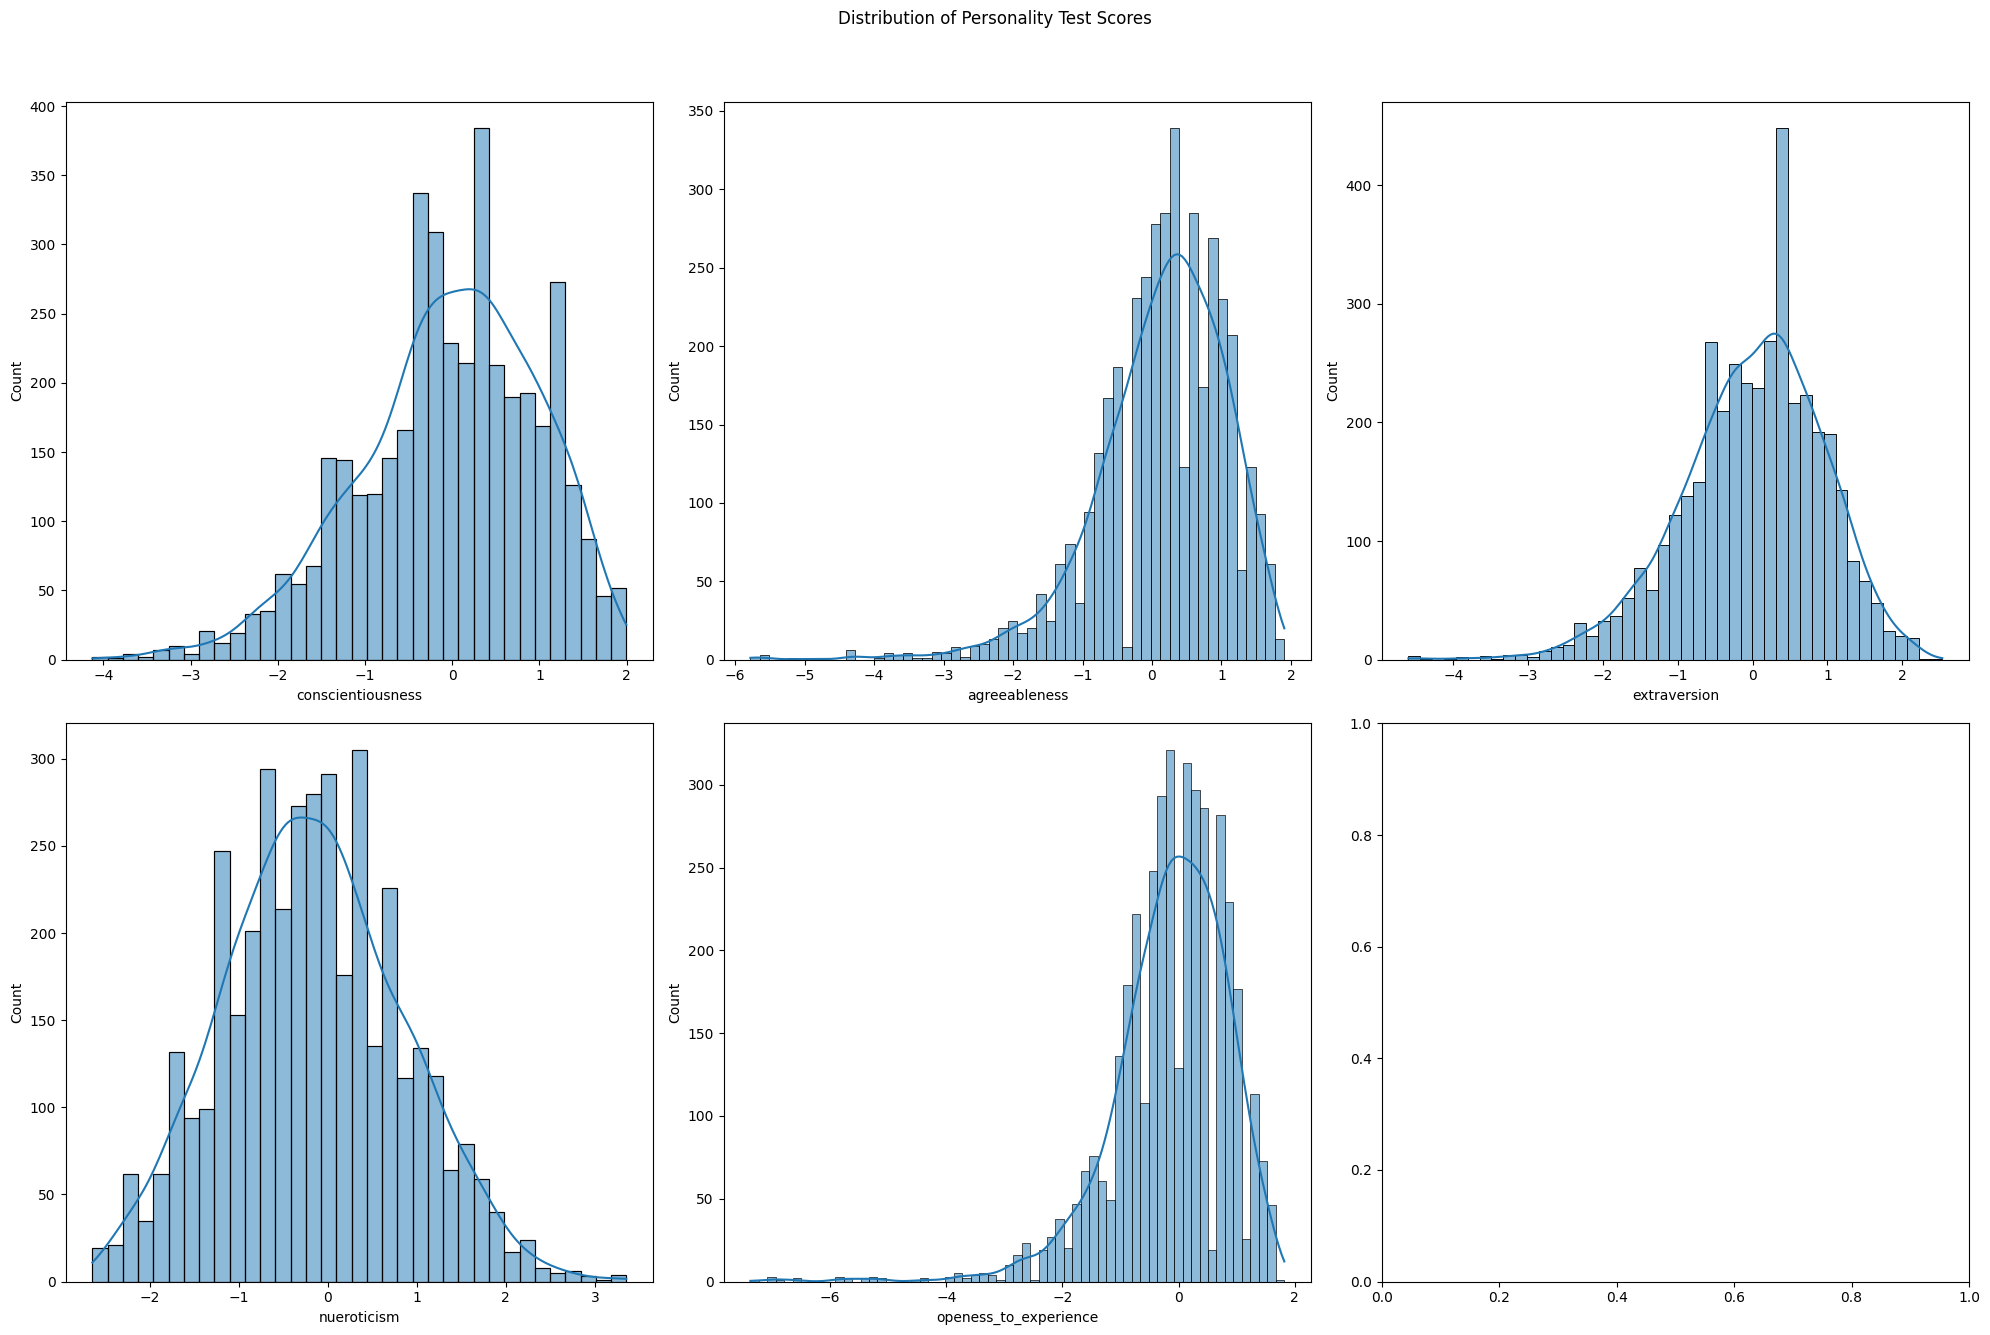

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

traits = [
    'conscientiousness',
    'agreeableness',
    'extraversion',
    'nueroticism',
    'openess_to_experience'
]

figure, axes = plt.subplots(2, 3, figsize=(20, 14))
figure.suptitle('Distribution of Personality Test Scores')

for i, trait in enumerate(traits):
    row, col = divmod(i, 3)
    sns.histplot(data=df[trait], ax=axes[row, col], kde=True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Observations:
- The distribution of personality test scores is predominantly left-skewed, suggesting that the majority of participants achieved higher scores on the test.
- The distribution for Neuroticism appears to follow a normal curve, indicating that approximately half of the participants may face challenges with emotional stability.

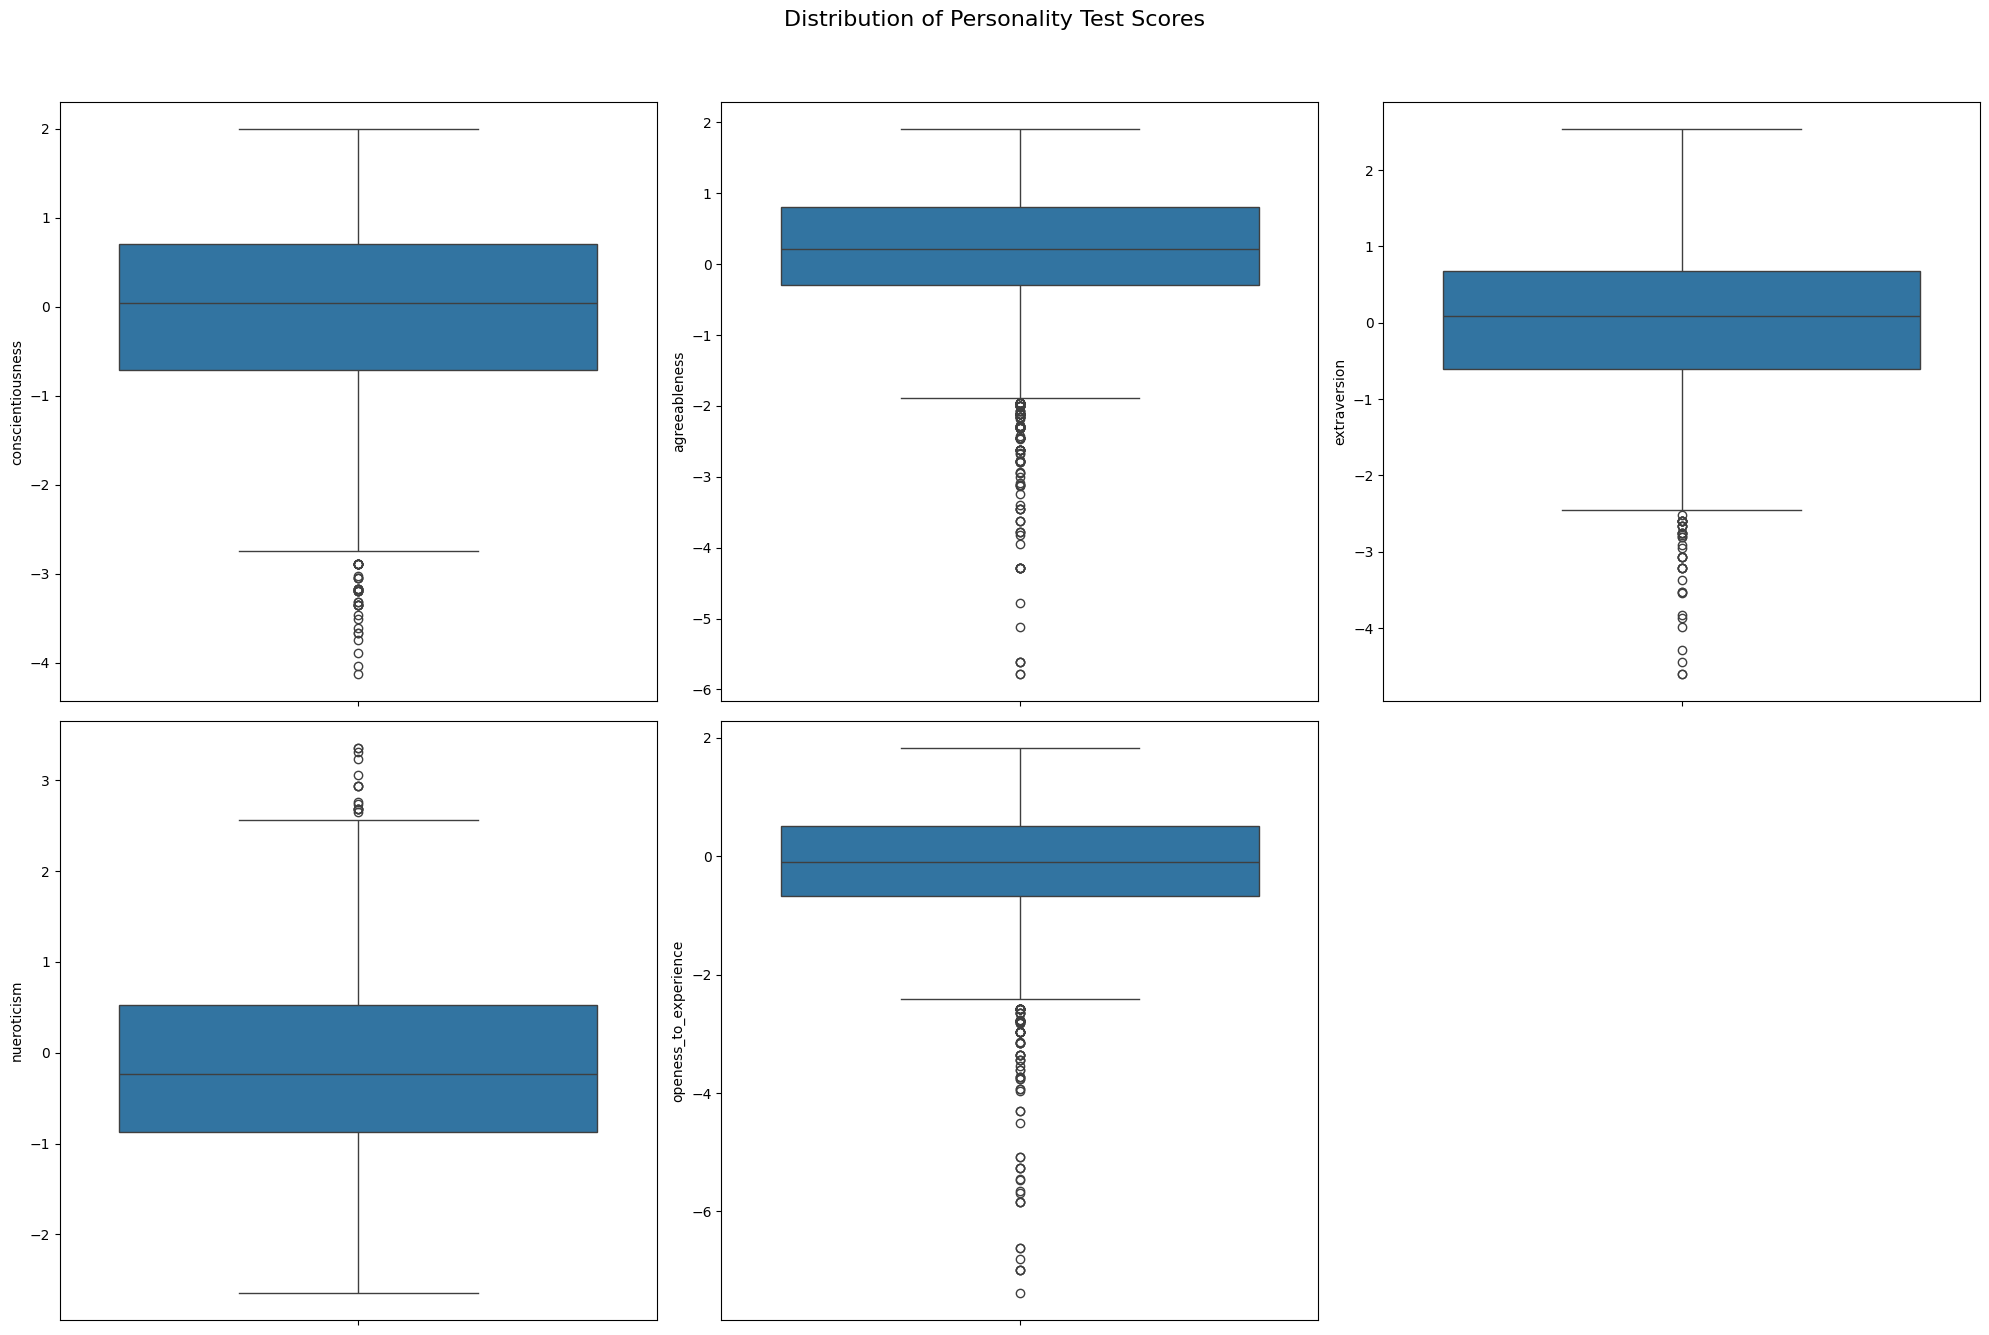

In [122]:
figure, axes = plt.subplots(2, 3, figsize=(20, 14))
figure.suptitle('Distribution of Personality Test Scores', fontsize=16)

for i, trait in enumerate(traits):
    row, col = divmod(i, 3)
    sns.boxplot(data=df[trait], ax=axes[row, col])

# Hide the empty subplot (bottom-right corner) as there are only 5 traits
axes[1, 2].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [123]:
# specialization

<Axes: ylabel='Specialization'>

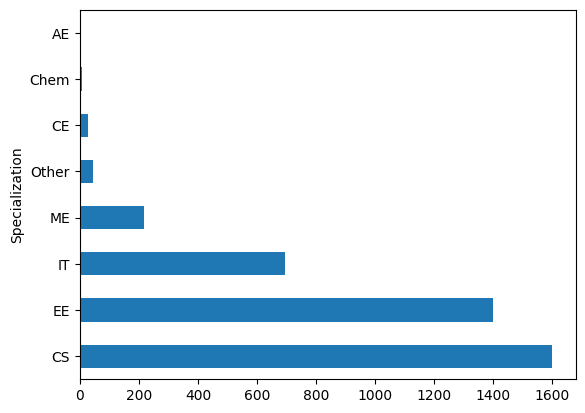

In [124]:
df['Specialization'].value_counts().plot(kind='barh')


<Axes: xlabel='Specialization', ylabel='count'>

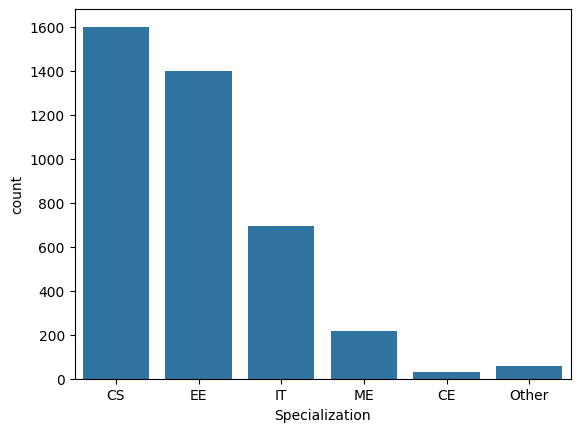

In [125]:
Domain_replace = {'Chem': 'Other', 'AE': 'Other'}
df['Specialization'].replace(Domain_replace, inplace=True)
sns.countplot(x=df['Specialization'])


<Axes: xlabel='Gender', ylabel='count'>

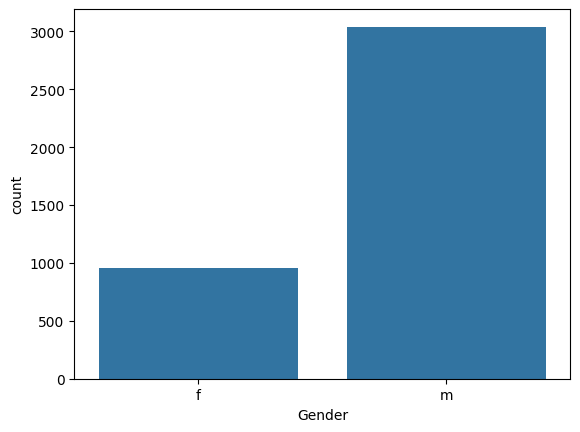

In [126]:
sns.countplot(x=df['Gender'])


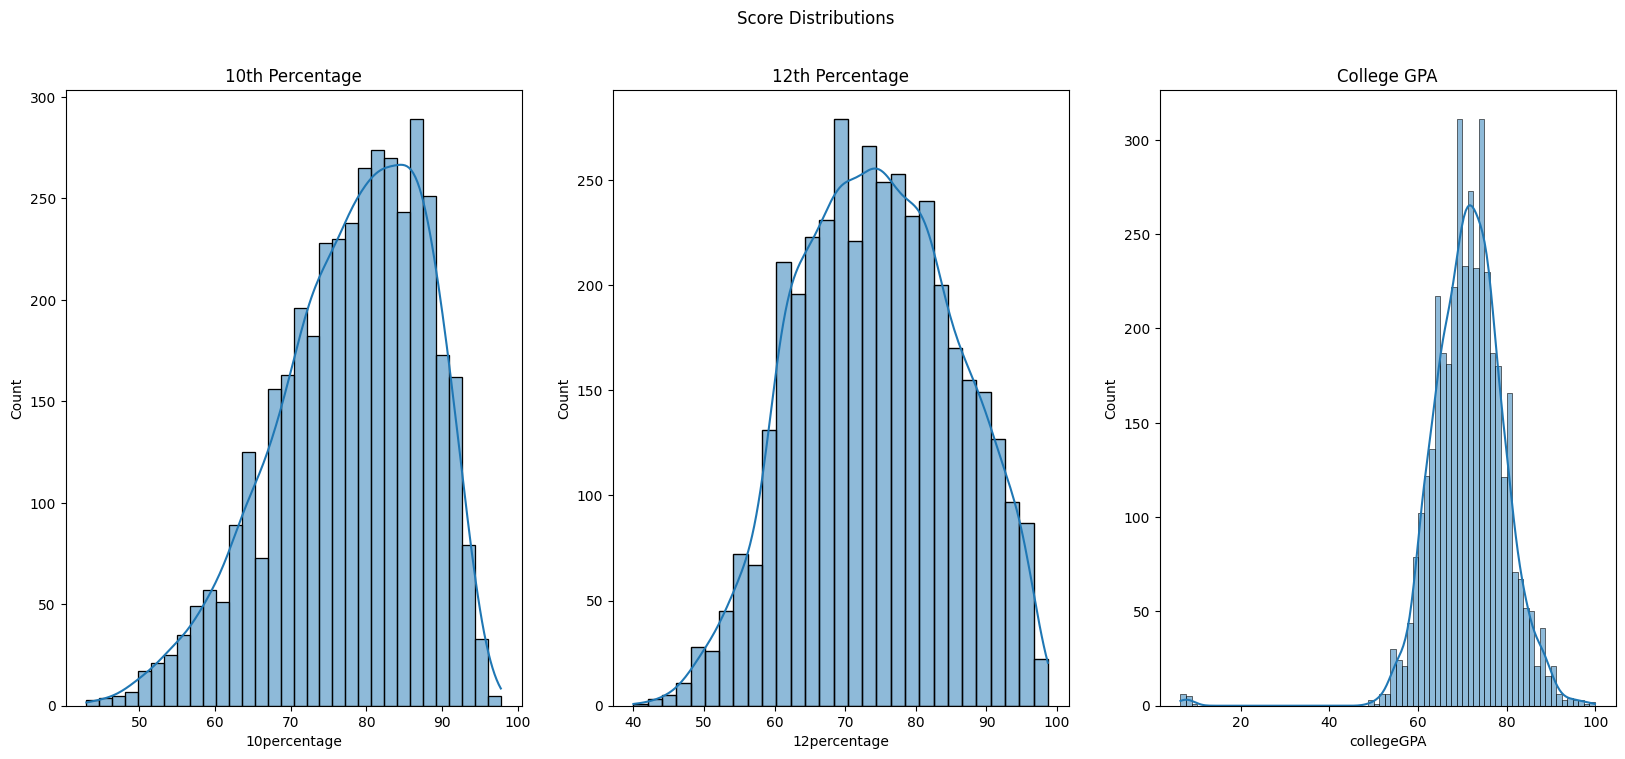

In [127]:
score_columns = ['10percentage', '12percentage', 'collegeGPA']
score_labels = ['10th Percentage', '12th Percentage', 'College GPA']

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Score Distributions')

for ax, score_col, label in zip(axes, score_columns, score_labels):
    sns.histplot(data=df[score_col], ax=ax, kde=True)
    ax.set_title(label)

plt.show()

- Many candidates scored between 50% and 100% in their 10th, 12th, and college examinations; however, a few students received failing marks in college, scoring below 20%

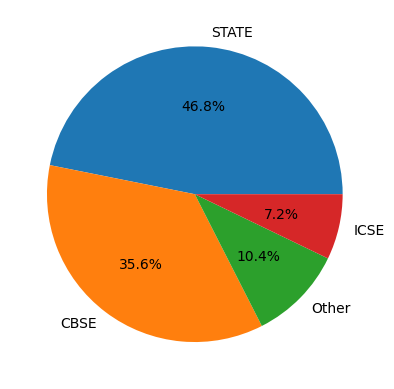

In [128]:
counts = df['XBoard'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()


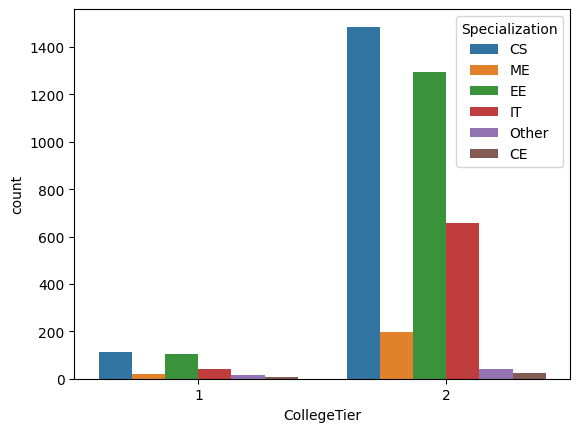

In [129]:
sns.countplot(x='CollegeTier', hue='Specialization', data=df)
plt.show()


In [130]:
popular_roles = df['Designation'].value_counts().head(15).index.tolist()


In [131]:
popular_roles

filtered_data = df[df['Designation'].isin(popular_roles)]
filtered_data


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
1,500000,2013-09-01,2024-10-04 05:12:13.446580,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,EE,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,133,35.0,CBSE,Indore
2,325000,2014-06-01,2024-10-04 05:12:13.446580,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721,124,32.0,CBSE,Chennai
3,1100000,2011-07-01,2024-10-04 05:12:13.446580,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,159,34.0,CBSE,Gurgaon
5,300000,2014-06-01,2024-10-04 05:12:13.446580,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.00,state board,5086,2,B.Tech/B.E.,EE,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608,124,32.0,STATE,Hyderabad
6,300000,2014-08-01,2015-05-01 00:00:00.000000,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,CS,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,8,31.0,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,430000,2013-03-01,2024-10-04 05:12:13.446580,system engineer,Gurgaon,f,1990-05-14,90.40,cbse,2007,87.00,cbse,167,2,B.Tech/B.E.,CS,77.00,167,0,Haryana,2012,585,595,675,0.901490,545,-1,-1,-1,-1,-1,-1,0.2782,0.3448,0.0914,-1.1422,-0.6035,139,34.0,CBSE,Gurgaon
3986,225000,2010-01-01,2010-10-01 00:00:00.000000,software test engineer,Bangalore,f,1986-02-28,84.93,maharashtra state board,2004,81.67,maharashtra state board,127,2,MCA,CS,74.73,127,0,Maharashtra,2010,515,545,545,0.819417,505,-1,-1,-1,-1,-1,-1,-0.1082,1.1248,1.9782,-1.9354,-1.0774,8,38.0,STATE,Bangalore
3989,300000,2014-09-01,2024-10-04 05:12:13.446580,software engineer,Bangalore,m,1991-11-23,74.88,state board,2010,82.55,state board,3572,2,B.Tech/B.E.,CS,80.00,3572,0,Karnataka,2014,500,480,500,0.356536,465,-1,346,-1,-1,-1,-1,0.1282,0.0459,1.2396,1.0333,0.6721,121,32.0,STATE,Bangalore
3993,280000,2011-10-01,2012-10-01 00:00:00.000000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,IT,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.6498,-0.9194,12,37.0,CBSE,Delhi


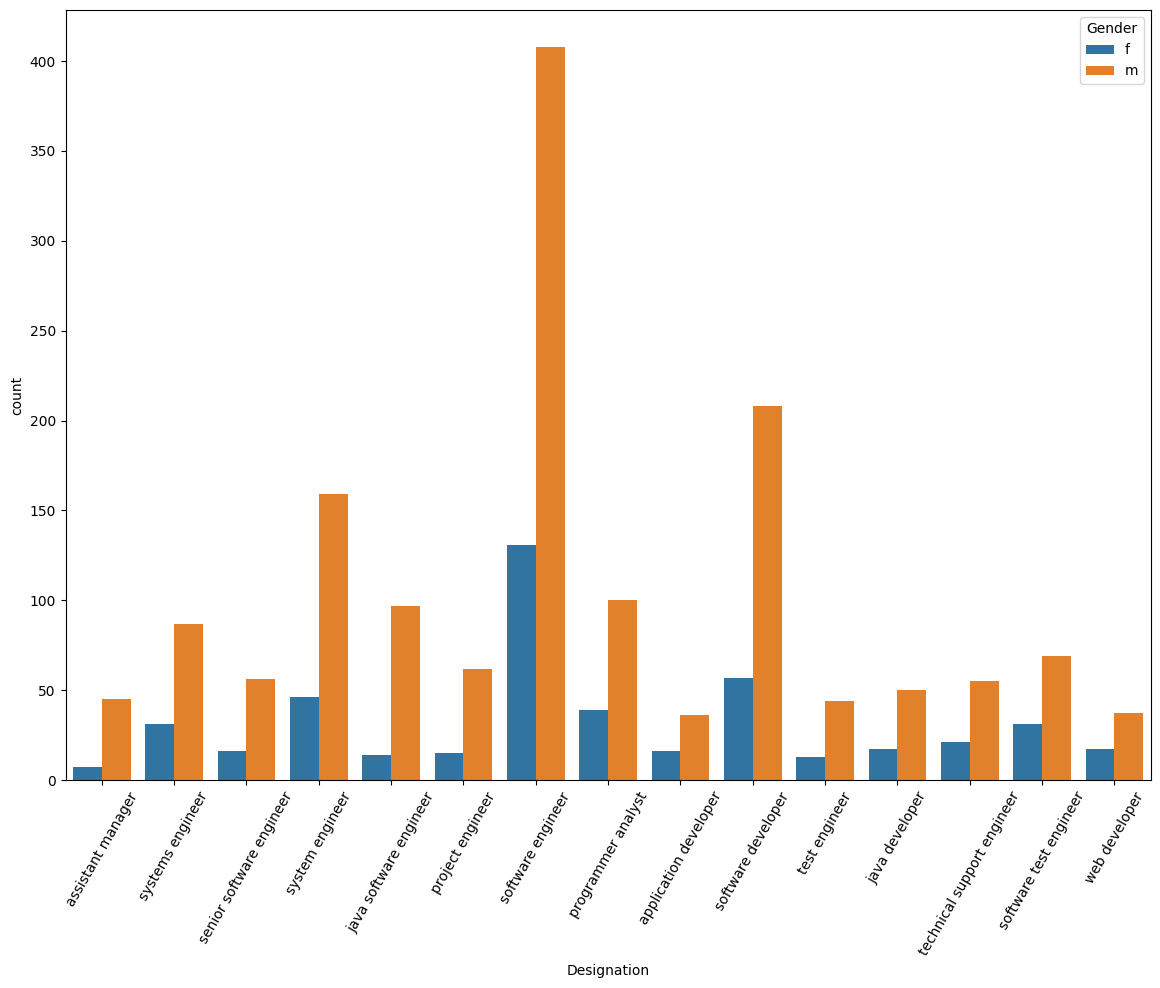

In [132]:
plt.figure(figsize=(14, 10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_roles), 'Designation'], hue='Gender', data=df)
plt.xticks(rotation=60)
plt.show()


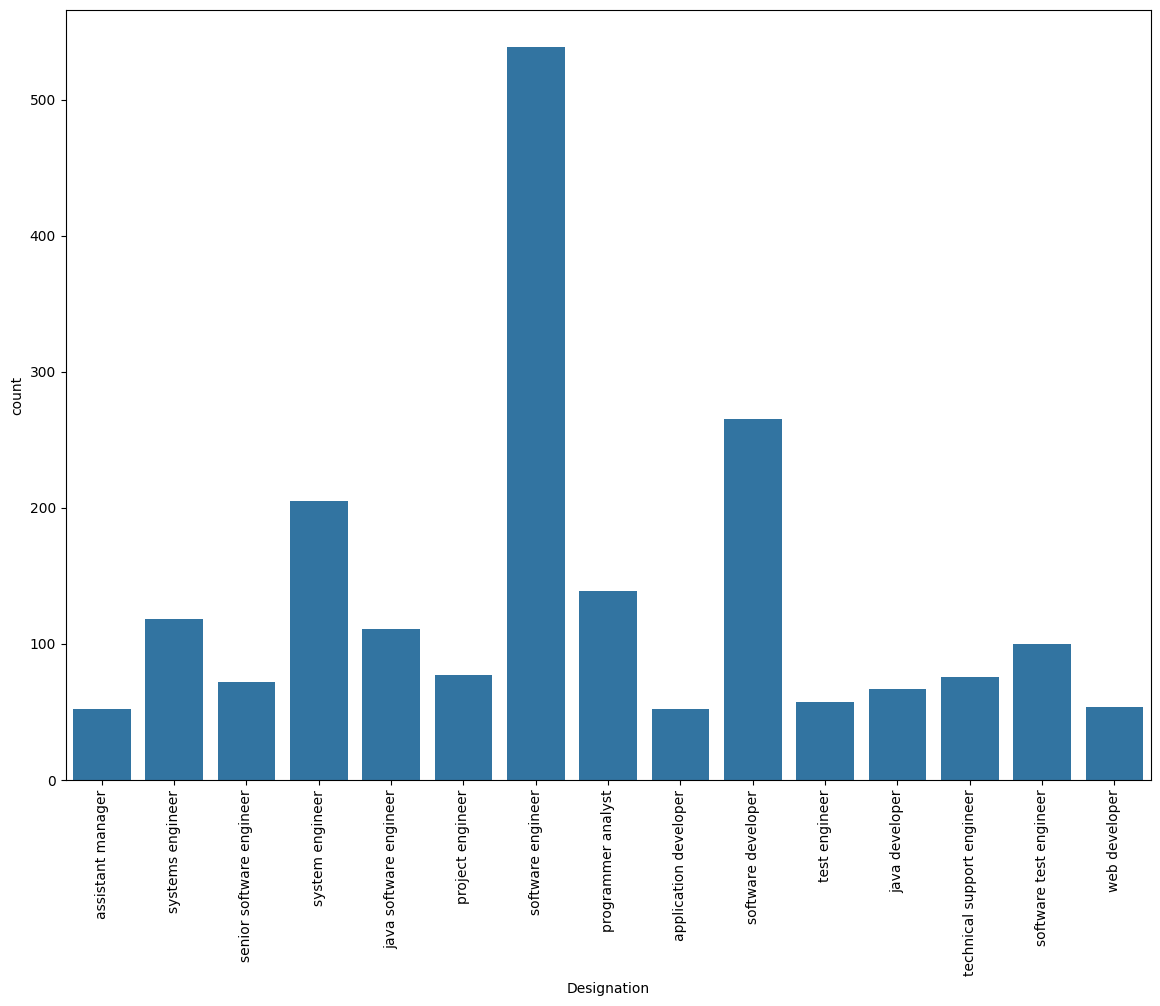

In [133]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_roles),'Designation'])
plt.xticks(rotation=90)
plt.show()

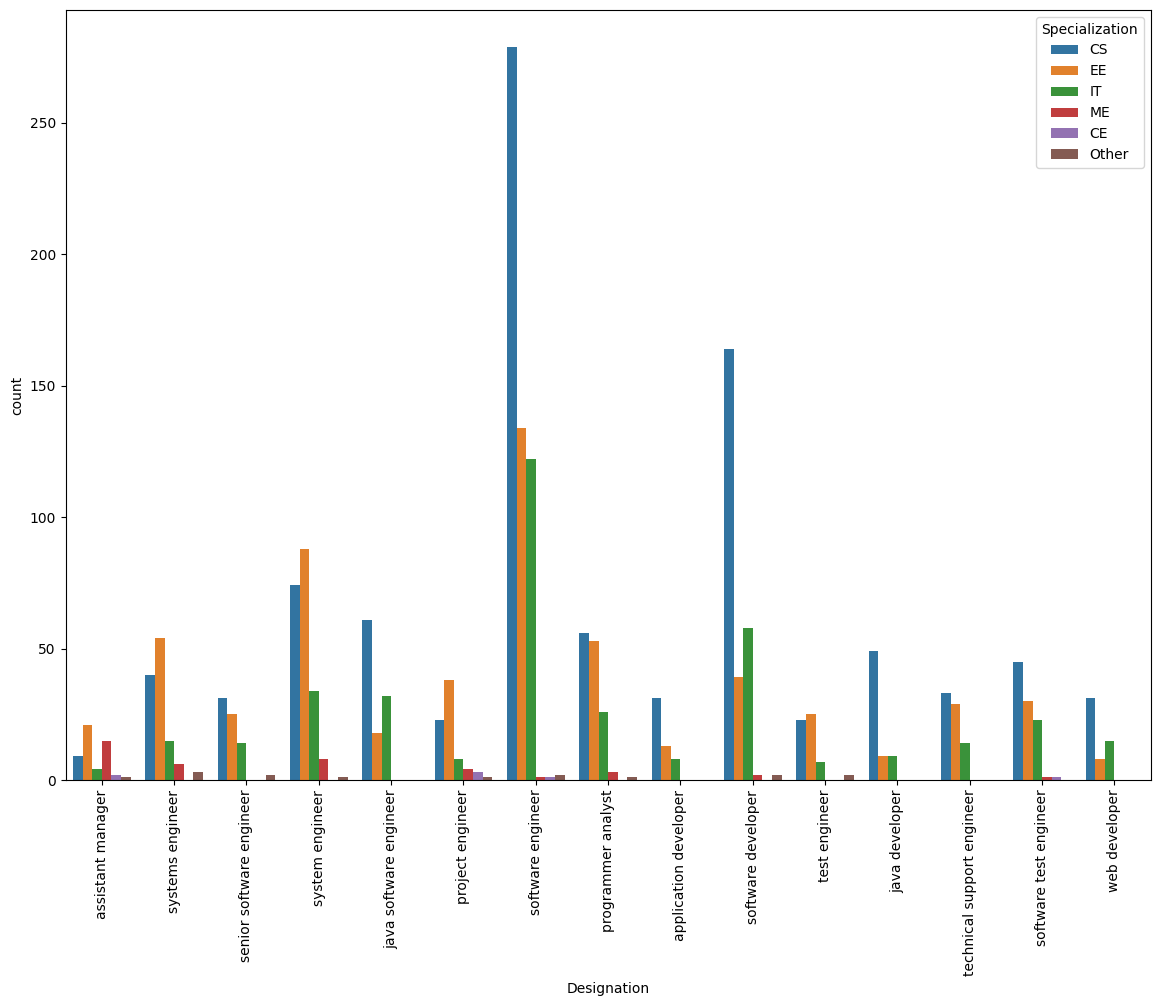

In [134]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['Designation'].isin(popular_roles),'Designation'],hue=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [135]:
popular_city = list(pd.DataFrame(df['JobCities'].value_counts()).head(15).index)

In [136]:
popular_city

temp_1 = df[df['JobCities'].isin(popular_city)]
temp_1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
0,420000,2012-06-01,2024-10-04 05:12:13.446580,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,CS,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,148,34.0,STATE,Bangalore
2,325000,2014-06-01,2024-10-04 05:12:13.446580,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,124,32.0,CBSE,Chennai
3,1100000,2011-07-01,2024-10-04 05:12:13.446580,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,159,34.0,CBSE,Gurgaon
5,300000,2014-06-01,2024-10-04 05:12:13.446580,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,87.00,state board,5086,2,B.Tech/B.E.,EE,76.32,5086,0,Karnataka,2014,560,555,620,-1.000000,645,-1,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,124,32.0,STATE,Hyderabad
6,300000,2014-08-01,2015-05-01 00:00:00.000000,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,67.50,state board,314,2,B.Tech/B.E.,CS,72.98,314,1,Karnataka,2014,590,435,380,0.356536,405,-1,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,8,31.0,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01 00:00:00.000000,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,IT,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,12,37.0,CBSE,Delhi
3994,100000,2013-07-01,2013-07-01 00:00:00.000000,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,EE,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,32.0,STATE,Hyderabad
3995,320000,2013-07-01,2024-10-04 05:12:13.446580,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,CS,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,135,33.0,STATE,Bangalore
3996,200000,2014-07-01,2015-01-01 00:00:00.000000,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,CS,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,6,32.0,STATE,Bangalore


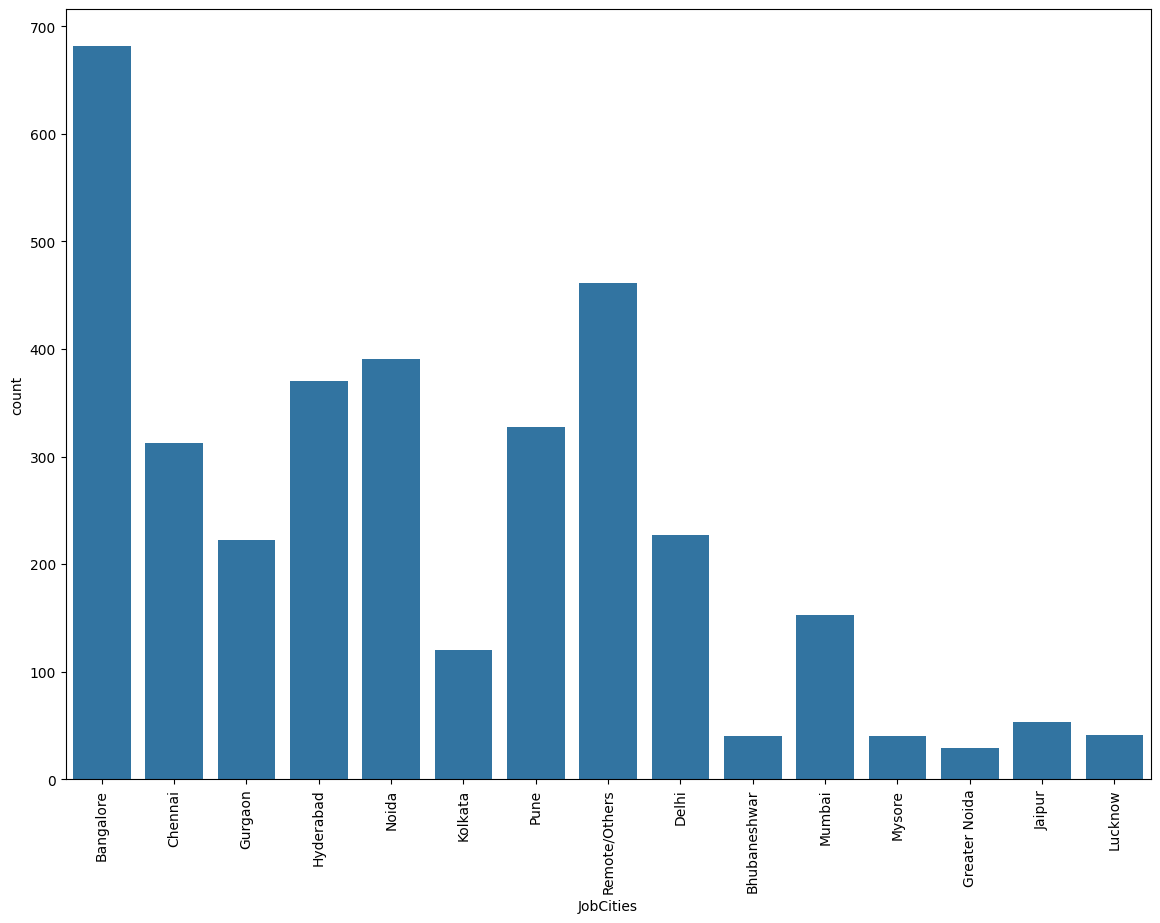

In [137]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'])
plt.xticks(rotation=90)
plt.show()

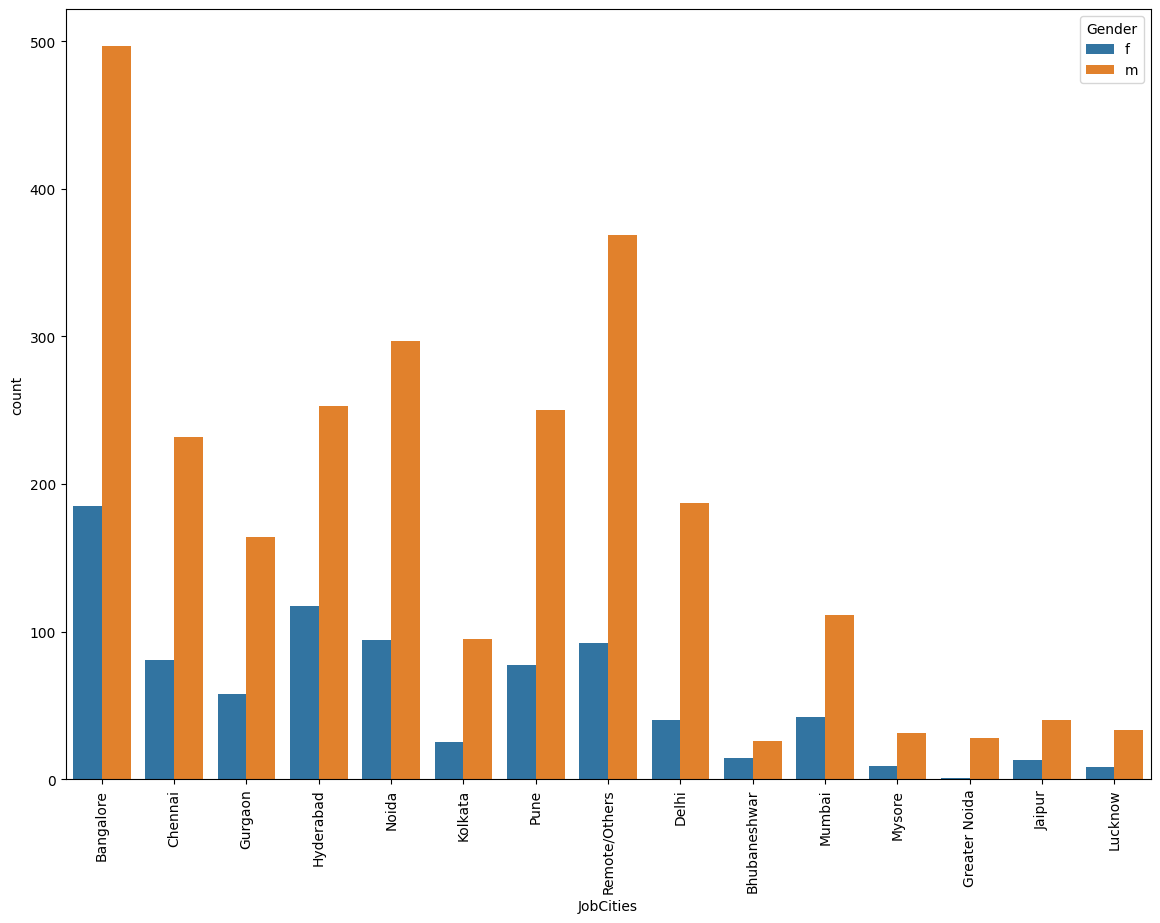

In [138]:
plt.figure(figsize=(14,10))
sns.countplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

In [139]:
# Bivariate analysis

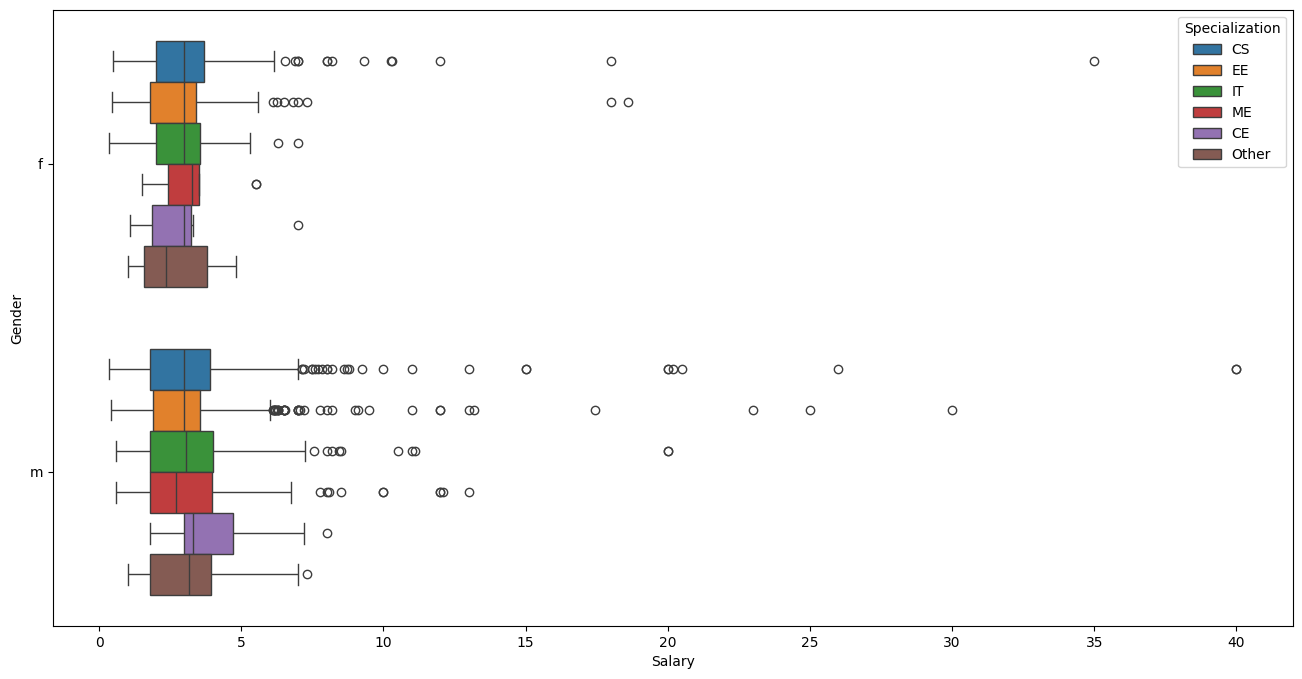

In [140]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df['Salary']/100000, y=df['Gender'],hue = df['Specialization'])
plt.show()

- Males generally have a wider range of salaries compared to females. There are also more men who earn much higher salaries, shown by the outliers.
- Specializations like Computer Science, Electrical Engineering, and IT have higher average salaries, while fields like Mechanical, Civil, and Others seem to have lower average pay.
- Outliers show that some people, especially men, in tech fields are earning a lot more than others.
- For females, the salary range is narrower, meaning their pay is more similar to each other, with fewer extreme cases.

In [141]:
temp_data = pd.DataFrame(df[df['Tenure']>=0])
temp_data.shape

(3959, 41)

In [142]:
temp_data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
0,420000,2012-06-01,2024-10-04 05:12:13.446580,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,CS,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,148,34.0,STATE,Bangalore
1,500000,2013-09-01,2024-10-04 05:12:13.446580,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,EE,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,133,35.0,CBSE,Indore
2,325000,2014-06-01,2024-10-04 05:12:13.446580,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,IT,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,124,32.0,CBSE,Chennai
3,1100000,2011-07-01,2024-10-04 05:12:13.446580,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,CS,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,159,34.0,CBSE,Gurgaon
4,200000,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,EE,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,11,33.0,CBSE,Manesar


<Axes: xlabel='Tenure', ylabel='Salary'>

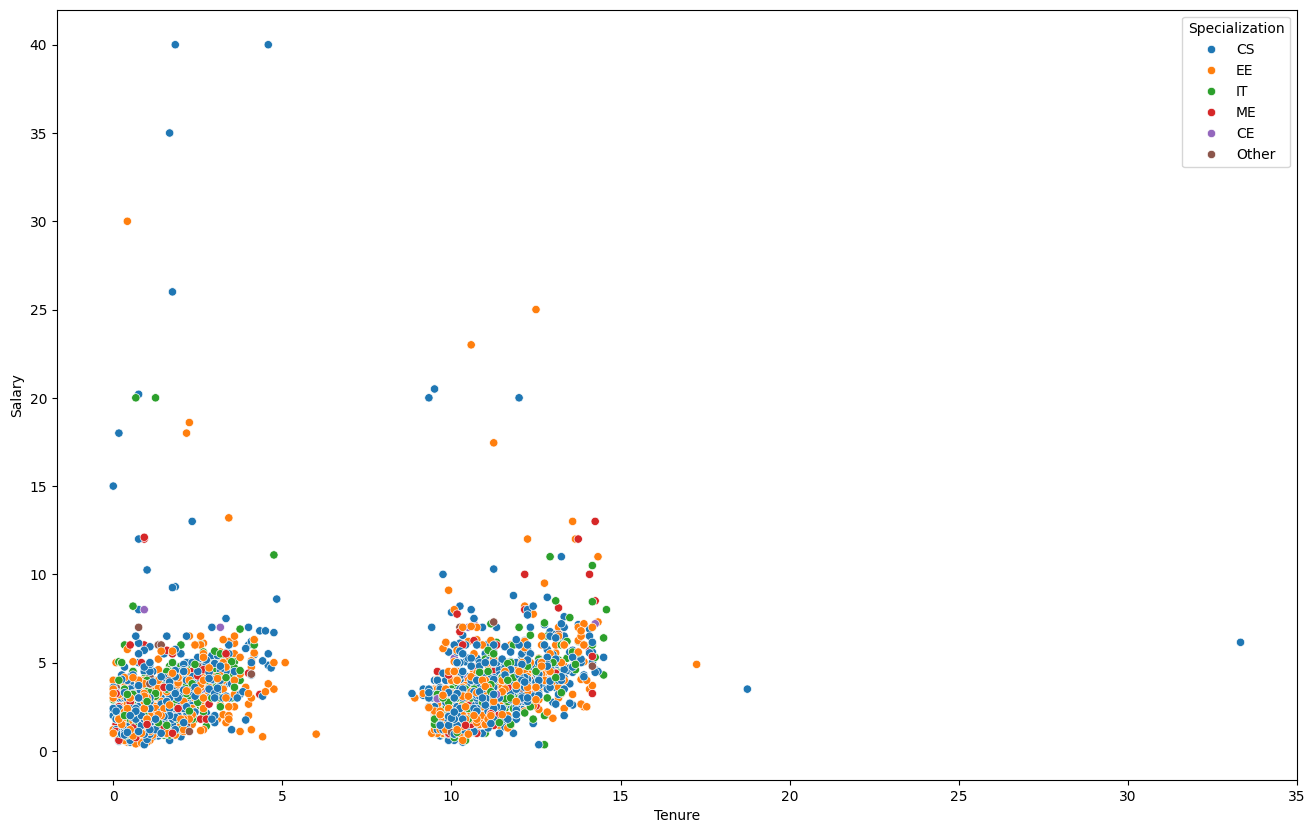

In [143]:
plt.figure(figsize=(16,10))
sns.scatterplot(x=temp_data['Tenure']/12,y=temp_data['Salary']/100000,hue=temp_data['Specialization'])

- Most employees have a tenure of less than 10 years, with salaries clustered around the lower range (0-10 units), regardless of specialization.
- Specializations like Computer Science (CS) and Electrical Engineering (EE) seem to have higher salary outliers, even at lower tenure levels.
- As tenure increases, there are a few individuals, especially in CS and EE, with much higher salaries, though they are exceptions.
- For the majority, salary does not appear to increase significantly with tenure beyond a certain point (around 10 years).

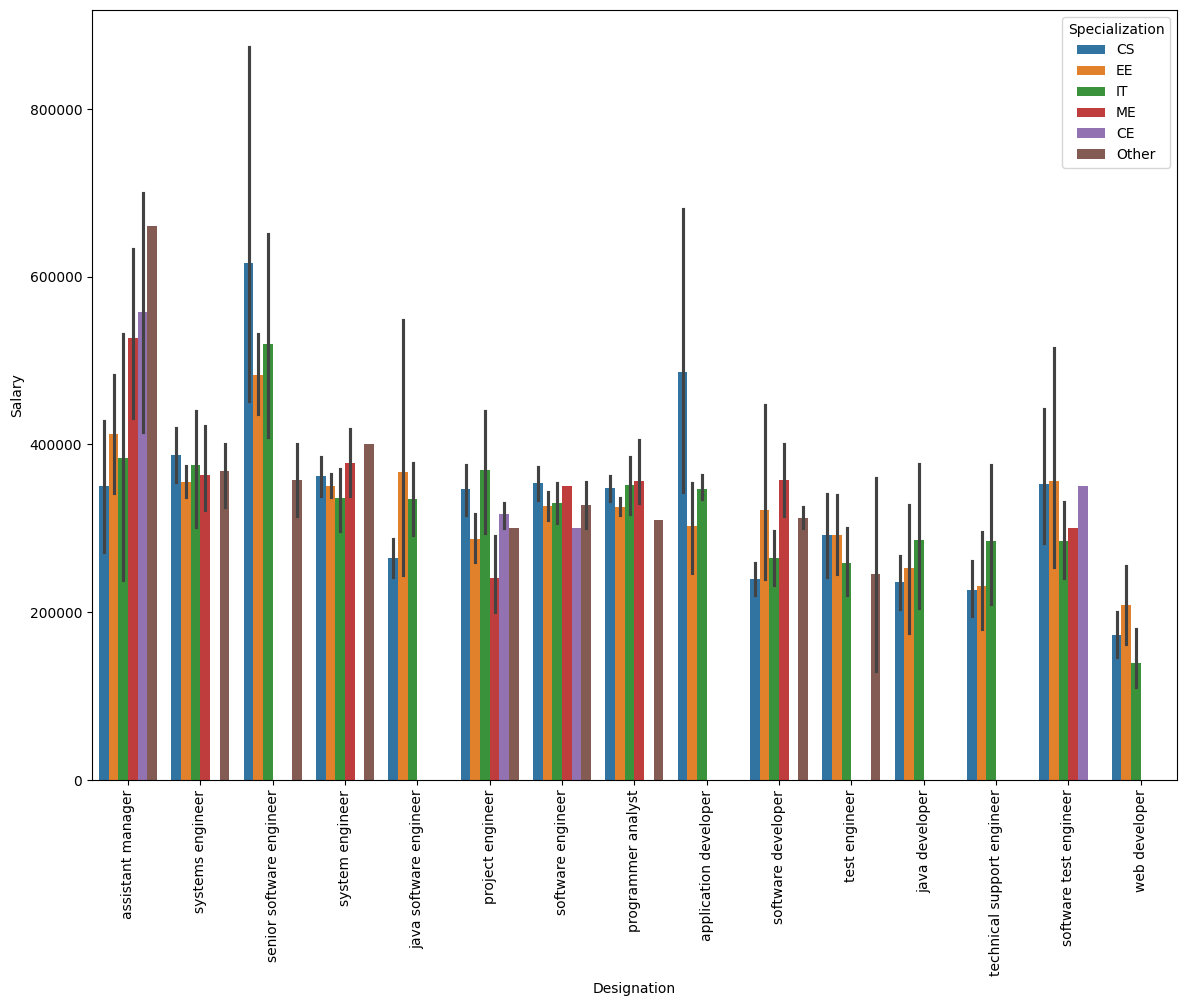

In [144]:
plt.figure(figsize=(14,10))
sns.barplot(x=df.loc[df['Designation'].isin(popular_roles),'Designation'],y=df['Salary'],hue = df['Specialization'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Specialization', ylabel='Salary'>

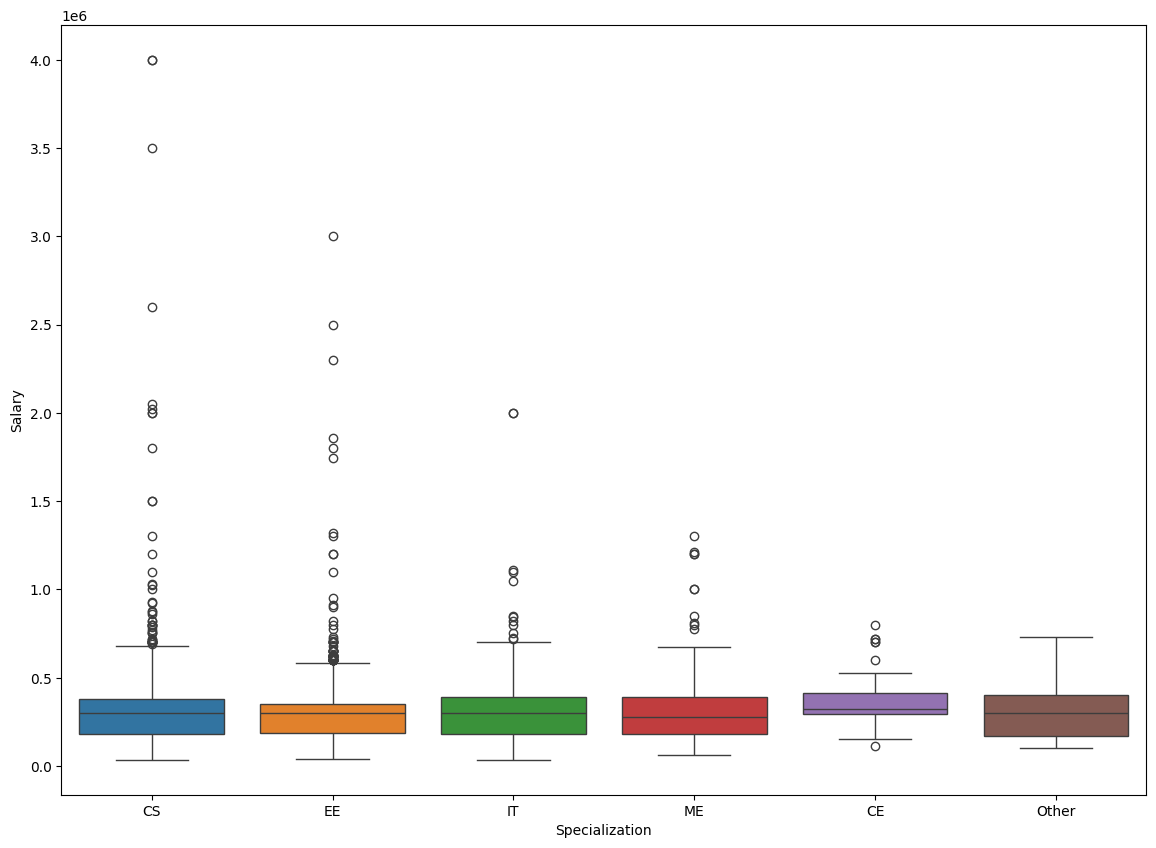

In [145]:
plt.figure(figsize=(14,10))
sns.boxplot(x=df['Specialization'], y=df['Salary'],hue = df['Specialization'])

### Insights:

1. The median salary of CS, EE, IT, ME, and other categories are almost similar.
2. The salary packages of CE specialization are low compared to CS, EE, IT and ME categories.
3. Salaries of CS and IT are almost same.

<Axes: xlabel='Specialization', ylabel='count'>

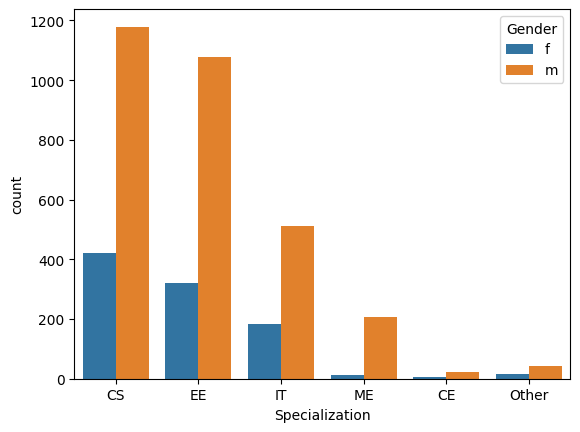

In [146]:
sns.countplot(x=df['Specialization'], hue=df['Gender'])

Insights:

1. The female aspirants are less than half of male aspirants in each specialization.
2. ME and CE branches has the least number of female aspirants.

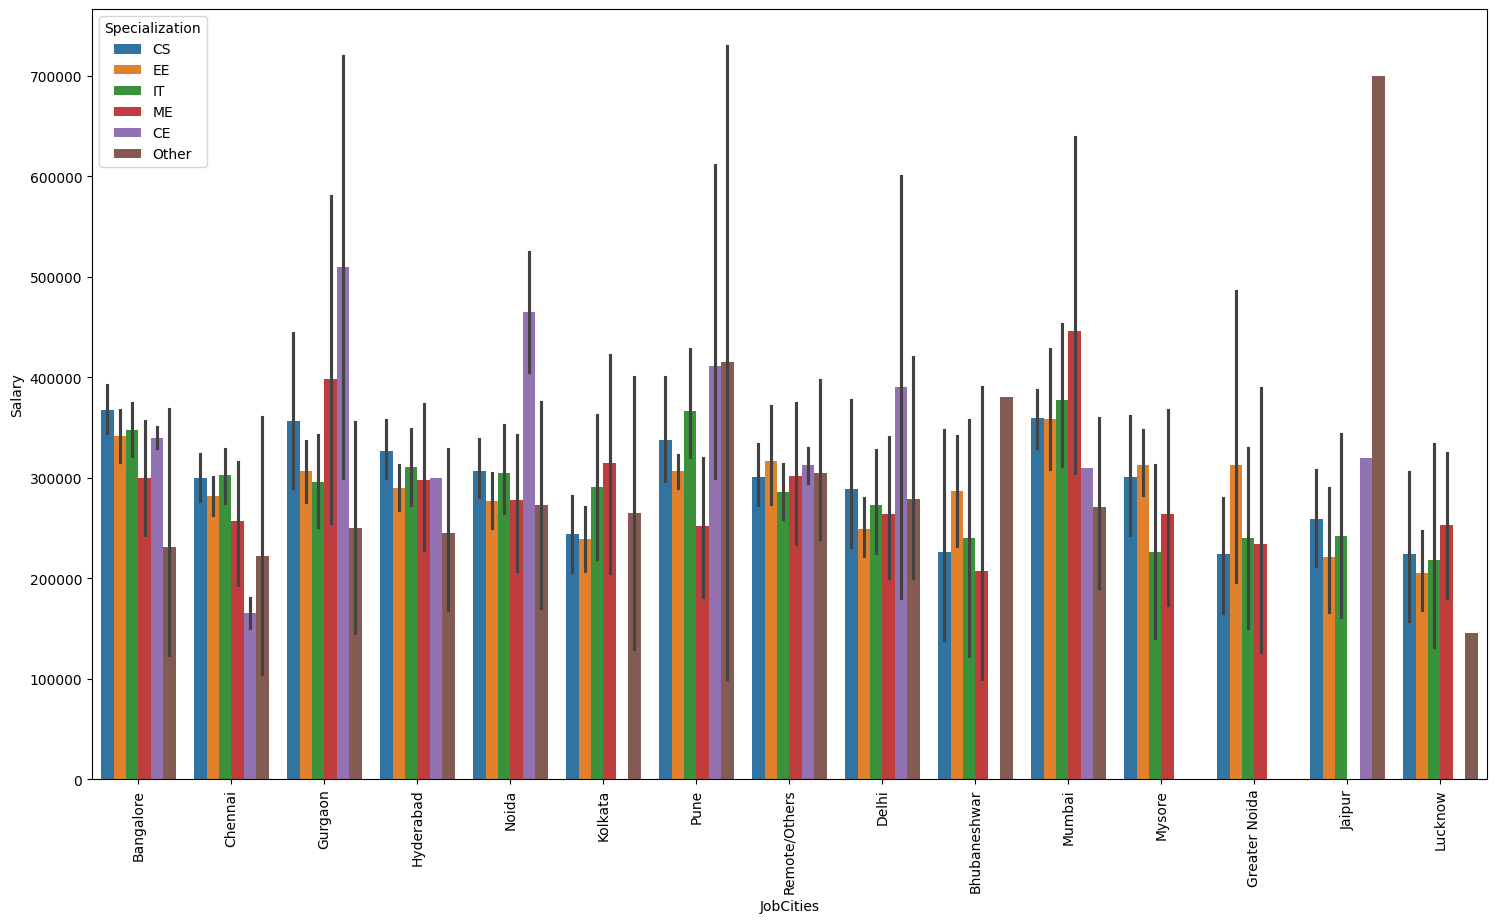

In [147]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'], y=df['Salary'], hue=df['Specialization'])
plt.xticks(rotation=90)
plt.show()

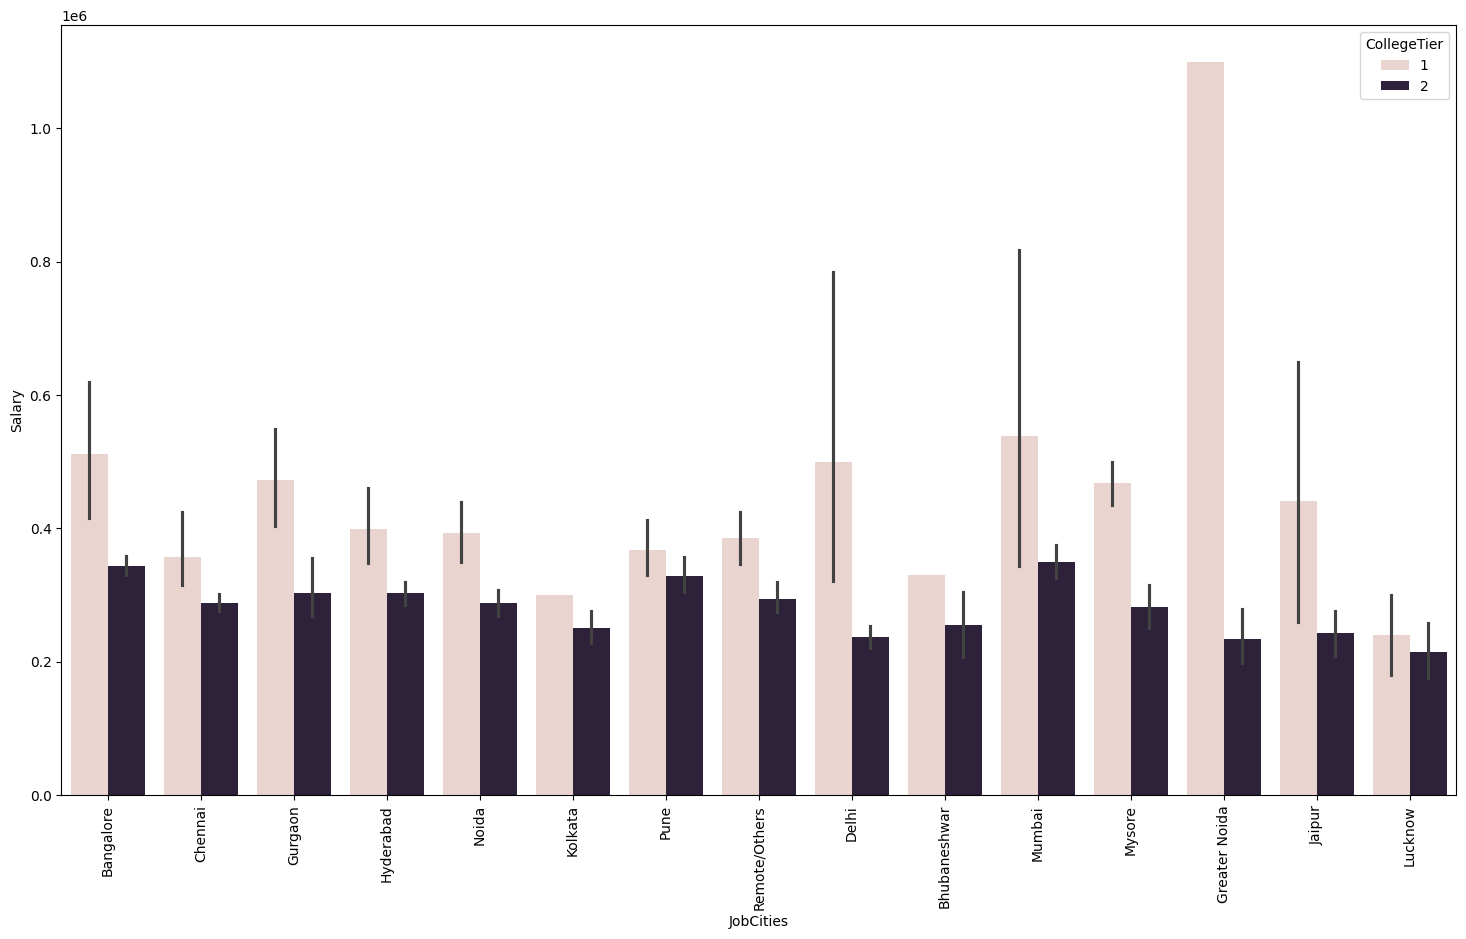

In [148]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=df['Salary'],hue=df['CollegeTier'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Gender', ylabel='Salary'>

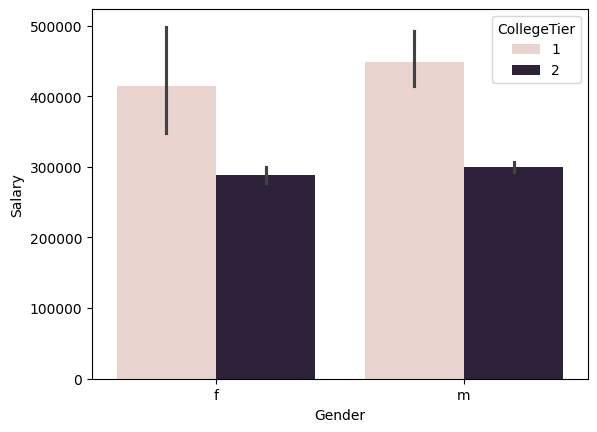

In [149]:
sns.barplot(x=df['Gender'],y=df['Salary'],hue=df['CollegeTier'])

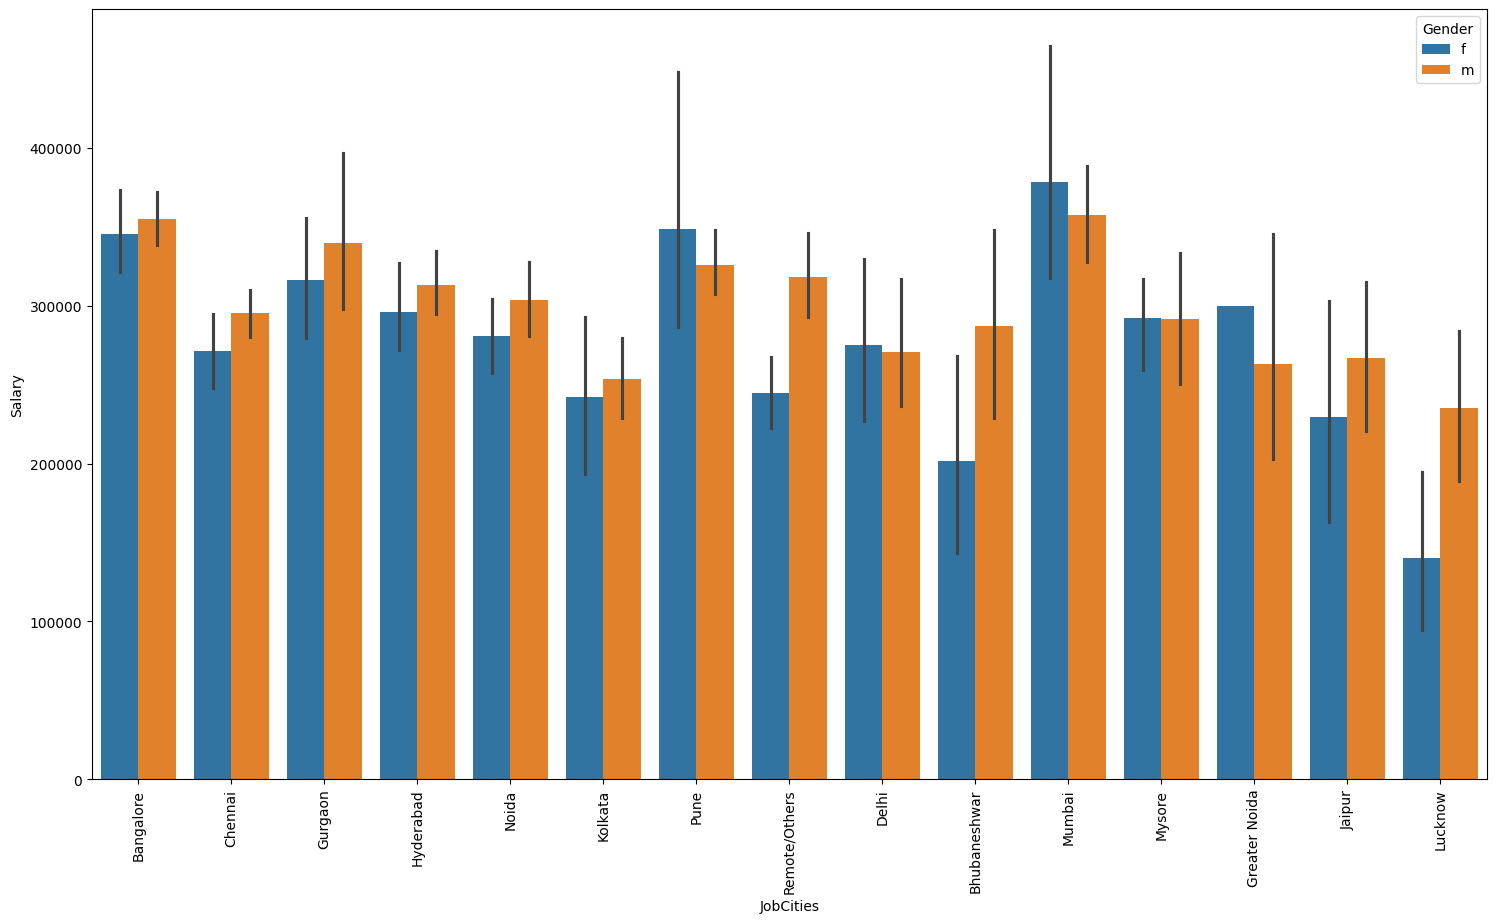

In [150]:
plt.figure(figsize=(18,10))
sns.barplot(x=df.loc[df['JobCities'].isin(popular_city),'JobCities'],y=df['Salary'],hue=df['Gender'])
plt.xticks(rotation=90)
plt.show()

In [151]:
# Research Questions:

#### Question-1 : Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”

In [152]:
claim_1_data = df[(df['Designation'].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df['Tenure']//12==0)]

claim_1_data

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age,XBoard,JobCities
24,335000,2014-06-01,2015-06-01,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,2010,90.00,state board,9173,2,B.Tech/B.E.,CS,76.00,9173,1,Telangana,2014,625,555,630,0.356536,475,-1,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.9950,-0.6692,11,31.0,STATE,Hyderabad
31,340000,2014-08-01,2015-04-01,software engineer,Bangalore,m,1992-10-23,77.20,state board,2010,86.10,state board,7282,2,B.Tech/B.E.,CS,71.00,7282,0,Tamil Nadu,2014,560,485,450,0.622643,485,-1,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.5021,0.2889,7,31.0,STATE,Bangalore
125,300000,2014-11-01,2015-03-01,programmer analyst,Kolkata,m,1992-03-19,90.00,cbse,2009,86.40,cbse,222,2,B.Tech/B.E.,EE,65.70,222,0,Jharkhand,2014,605,325,515,0.837621,334,-1,-1,-1,500,-1,-1,0.1282,-0.2871,1.3933,0.6530,-0.6692,3,32.0,CBSE,Kolkata
168,375000,2014-07-01,2015-04-01,software engineer,Noida,m,1993-03-28,85.80,cbse,2010,78.40,cbse,47,1,B.Tech/B.E.,CS,77.56,47,1,Delhi,2014,530,595,340,0.842248,485,-1,469,-1,-1,-1,-1,1.2772,1.2114,-2.1418,-1.7556,-0.6692,9,31.0,CBSE,Noida
209,300000,2014-06-01,2015-04-01,associate engineer,Bangalore,f,1992-01-04,87.00,state board,2009,84.70,state board,12451,2,B.Tech/B.E.,IT,76.67,12451,1,Telangana,2013,360,435,295,0.190153,315,-1,-1,-1,-1,-1,-1,1.4208,0.8784,0.7785,-0.1076,0.8637,9,32.0,STATE,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,300000,2014-10-01,2015-04-01,software engineer,Navi Mumbai,m,1990-11-24,87.20,state board,2009,87.14,state board,5216,2,B.Tech/B.E.,CS,77.00,5216,1,West Bengal,2014,605,590,535,0.356536,465,-1,346,-1,-1,-1,-1,-0.3027,-0.4536,-2.6028,0.7798,0.2889,5,33.0,STATE,Mumbai
3917,105000,2014-10-01,2015-04-01,software engineer,Kochi/Cochin,f,1991-12-14,93.00,state board,2009,80.00,state board,6431,2,B.Tech/B.E.,CS,72.78,6431,0,Kerala,2013,370,595,370,0.670743,455,-1,-1,-1,-1,-1,-1,-0.3027,0.5454,-0.6048,-1.6289,0.2889,5,32.0,STATE,Kochi
3925,240000,2013-06-01,2014-02-01,software engineer,Bangalore,m,1989-11-14,65.00,state board,2007,50.00,state board,7000,2,MCA,CS,73.14,7000,1,Karnataka,2013,625,495,430,0.793581,495,-1,-1,-1,-1,-1,-1,-0.8772,-0.6201,-0.4511,0.6530,-0.4776,8,34.0,STATE,Bangalore
3978,320000,2013-08-01,2014-01-01,software engineer,Hyderabad,f,1991-04-24,89.70,icse,2009,86.70,icse,7685,2,B.Tech/B.E.,IT,80.00,7685,1,West Bengal,2013,720,675,570,-1.000000,-1,-1,-1,-1,-1,-1,-1,0.2718,1.2114,0.4711,-0.1076,0.8637,5,33.0,ICSE,Hyderabad


<Axes: xlabel='Designation', ylabel='Salary'>

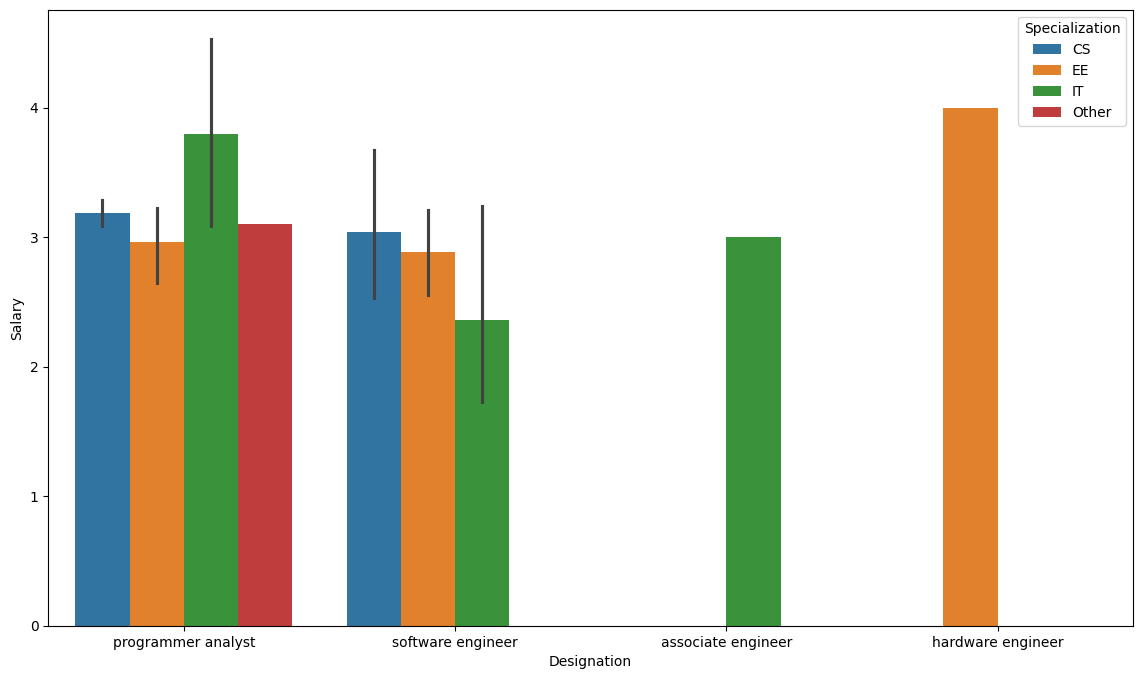

In [153]:
plt.figure(figsize=(14,8))
sns.barplot(x=claim_1_data['Designation'],y=claim_1_data['Salary']/100000,hue=claim_1_data['Specialization'])

#### Question-2 : Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

<Axes: xlabel='Specialization', ylabel='count'>

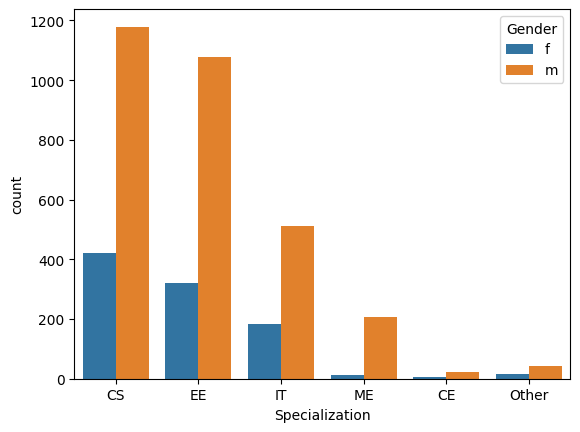

In [154]:
sns.countplot(x=df['Specialization'], hue=df['Gender'])

There is a slight relationship between gender and specialization as we can see females mostly prefer CS, EE and IT specializations.

# Final Conclusion of EDA on AMCAT:
- Most of the aspirants are male from CS and EE department from Tier-1 Colleges and they work in IT domain, mostly in Mumbai and Bangalore cities with an average salary of 3LPA and maximum salary of 40LPA.
- Most of the female aspirants prefer CS, EE, IT departments rather than mechanical, civil and they also prefer to work in IT domain mostly in Mumbai, Pune cities with an average salary of 2.9LPA and maximum salary around 36–37 LPA.
- Bangalore is most sought out place for working but most of the students from Tier-1 college work in Greater Noida.
- Software Engineer and Software developer are the most popular roles among the aspirants whereas senior software engineer and assistant manager roles have the highest salary package.